# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**



In this project, our task was to identify major customer segments on a transnational data set that contained one-year historical transactions for a UK-based online retail store. This would help the company segregate its customers based on transaction data and help them in marketing decisions and strategy. This project belongs to unsupervised machine learning and we will be implementing machine learning models like K means Cluster, DB Scan Cluster, and Hierarchical Cluster, etc.

**Steps I followed in making the project:**

•	After loading data and important libraries

•	I did some exploratory data analysis to find patterns or trends in customer purchase behavior.

•	I did some feature engineering, making new features like hour, day, months, and time type, the total amount to classify the purchase behavior.

•	The main part of the project is RFM analysis, which created the basis for model building.

•	handling the skewness and transforming the distribution of the RFM feature for model implementation.

•	Implemented unsupervised machine learning models like Quantile-based Clustering, Binning cluster, K-means Cluster, Hierarchical Cluster, and DB Scan cluster for Customer segmentation.

•	Got a 3-D cluster view of each model along with important information like last visited, purchase frequency, and money spent.




**Result:**

•	Using the Silhouette Score and Elbow curve I got the optimal number of clusters in K-means Clustering as 4.

•	In hierarchical clustering I got the optimal number of clusters as 3.

•	And in DB Scan clustering the optimal number of clusters is also 4.

•	3-D view of all clusters in all different models are shown.


# **GitHub Link -**

https://github.com/Sohailtanveer1/Online-Customer-Segmentation-Unsupervised-ML.git

# **Problem Statement**


### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **1. Know Your Data**

### **Import Libraries**

In [ ]:
# Importing required libraries
import numpy as np
# To handle the dataset
import pandas as pd

# For plots and visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
# To scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples
# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Display utilities
from IPython.display import Markdown, display

# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')

# setting default parameters for the plots
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["figure.dpi"] = 150

### **Dataset Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Online Retail Customer Segmentation/Online Retail.xlsx - Online Retail.csv'

# Importing dataset to create a dataframe
data = pd.read_csv(path)

### **Dataset First View**

In [ ]:
# Dataset First Look

data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [ ]:
# last five observations of the dataset
data.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID Country  
541904  12/9/11 12:50       0.85     12680.0  France  
541905  12/9/11 12:50       2.10     12680.0  France  
541906  12/9/11 12:50       4.15     12680.0  France  
541907  12/9/11 12:50       4.15     12680.0  France  
541908  12/9/11 12:50       4.95     12680.0  France

### **Dataset Rows & Columns count**

In [ ]:
# Dataset Rows & Columns count

data.shape

(541909, 8)

### **Dataset Information**

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Dataset Duplicate Value Count

print(data.duplicated().sum())

5268


**The dataset has 5268 duplicate observations.**

### **Missing or NULL values **

In [ ]:
# Missing Values/Null Values Count

data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

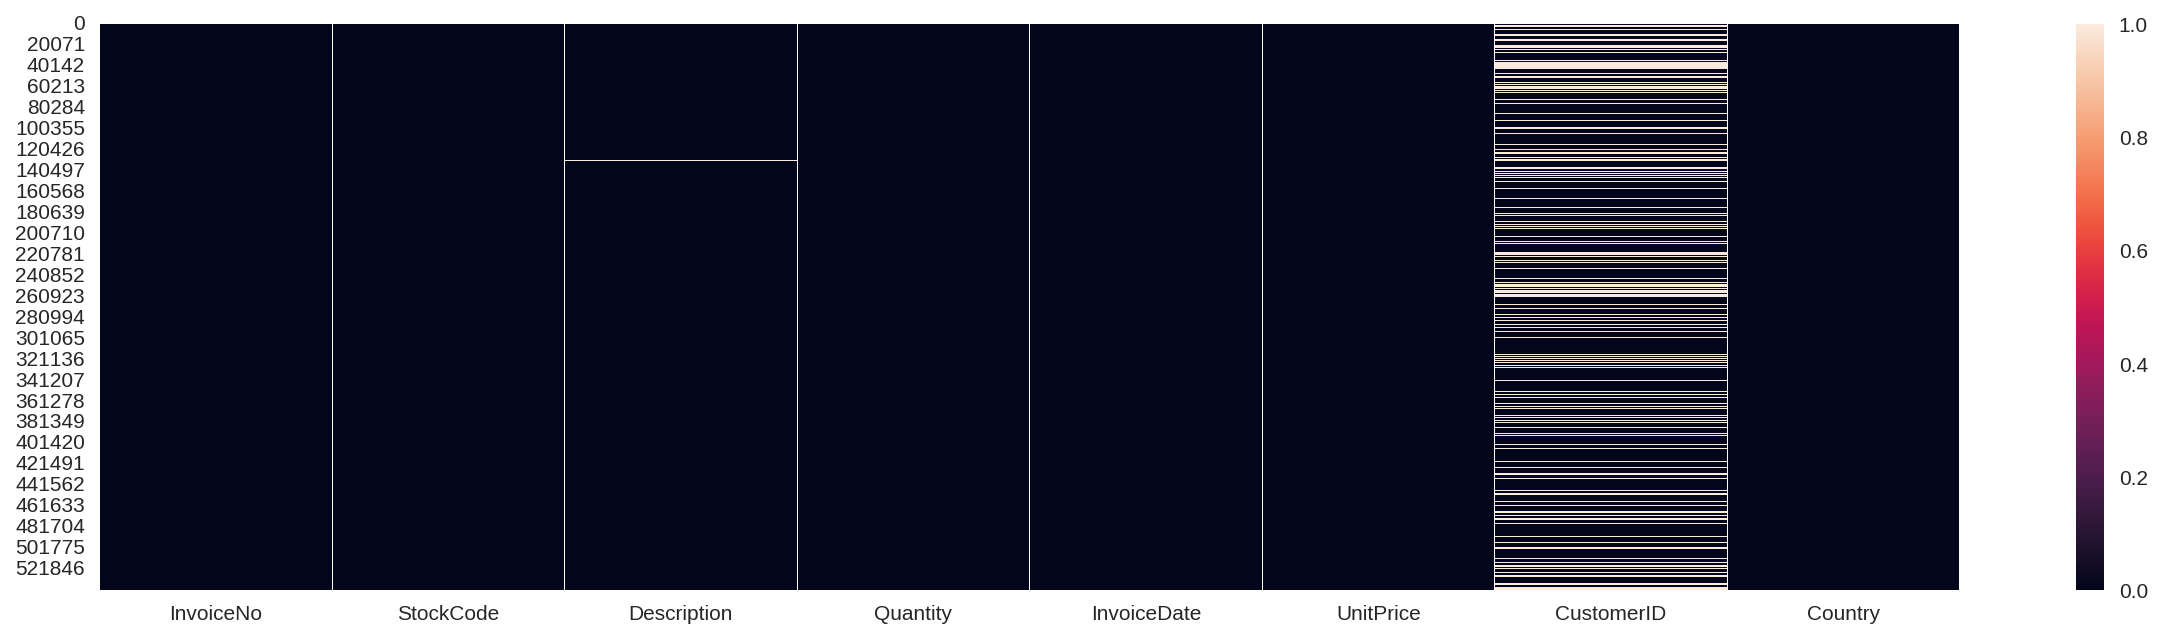

In [ ]:
# Visualizing the missing values

sns.heatmap(data.isnull())

In [ ]:
missing = data.columns[data.isnull().any()].tolist()

print('Missing or NULL Values Count')
print(data[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing or NULL values Percentage')
print(round(data[missing].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing or NULL Values Count
CustomerID     135080
Description      1454
dtype: int64
------------------------
Missing or NULL values Percentage
CustomerID     24.93
Description     0.27
dtype: float64


24.93% of items purchases are not assigned to any customer

Hence there is no use of having the data with no customer assignment. Because we can't form clusters without CustomerID so we will delete them from dataset.

# **2. Understanding Your Variables**

In [ ]:
# Dataset Columns

data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe

data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

**UnitPrice has minimum value negative which is not possible. So we will replace negative value with median values.**

In [ ]:
# creaate a copy of original dataset
df=data.copy()

In [ ]:
df[df['UnitPrice']<=0]=df['UnitPrice'].median()

In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  409306.000000
mean        9.809834       4.661601   15193.797338
std       214.912455      94.394903    2084.772848
min    -80995.000000       0.001000       2.080000
25%         1.000000       1.250000   13890.000000
50%         3.000000       2.080000   15130.000000
75%        10.000000       4.130000   16782.000000
max     80995.000000   38970.000000   18287.000000

**Now our dataset is statistically correct **

### **Variables Description** 

**Attribute Information:**

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

### **Check Unique Values for each variable.**

In [ ]:
# Check Unique Values for each variable.

for col in df.columns:
  print(col,':',df[col].nunique())

InvoiceNo : 23797
StockCode : 3939
Description : 4043
Quantity : 511
InvoiceDate : 21803
UnitPrice : 1628
CustomerID : 4372
Country : 39


### **Data Cleaning**

In [ ]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
#drop null values
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

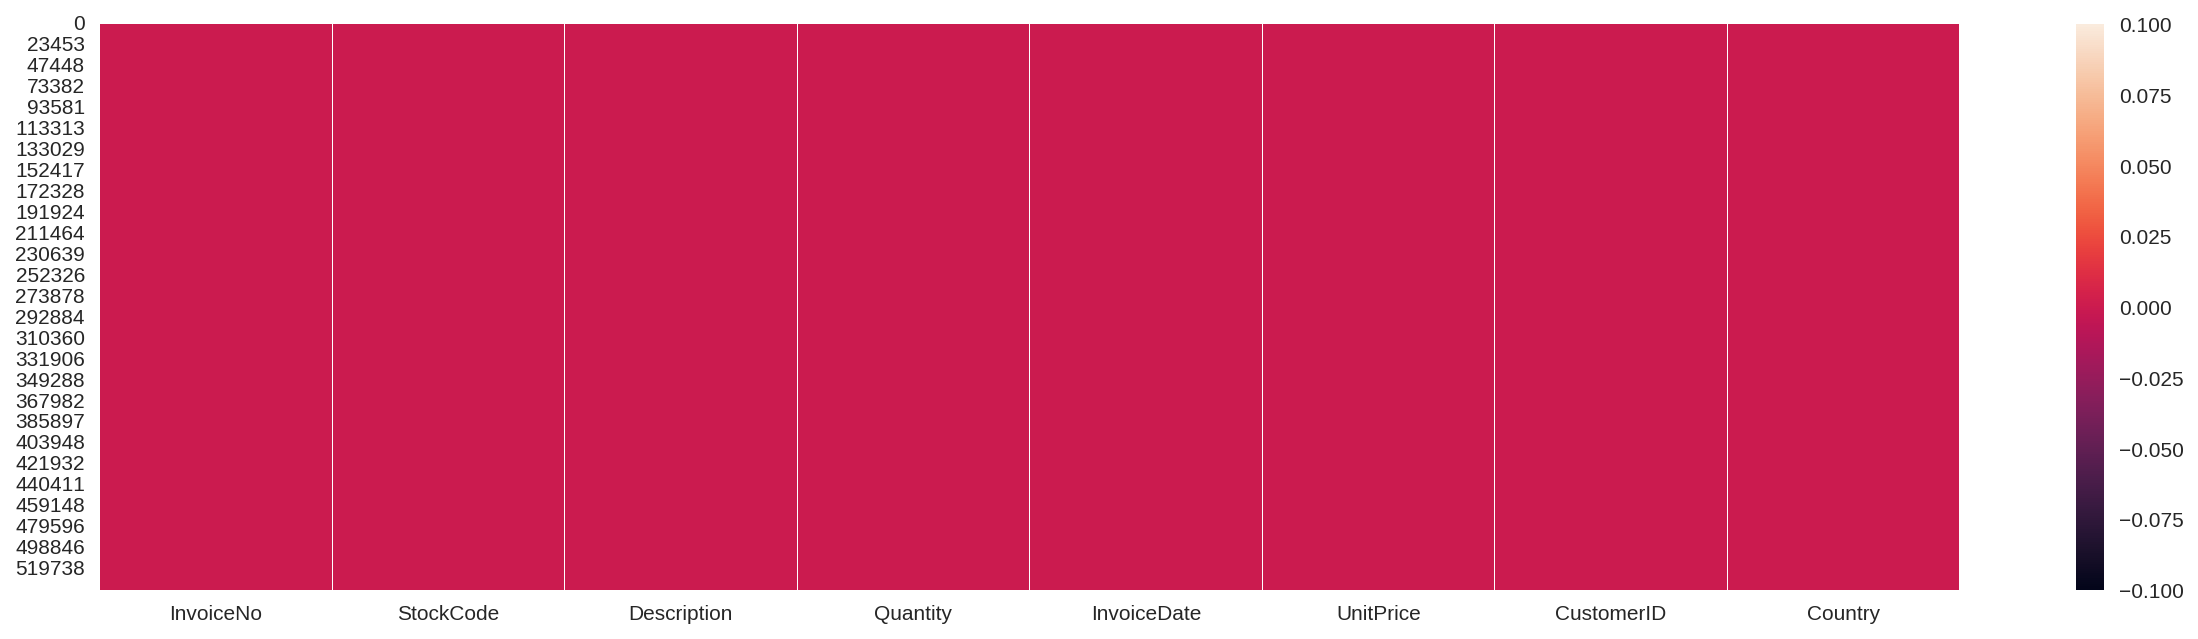

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.shape

(401565, 8)

# **3. EDA Exploratory Data Analysis**

### **Pre-Processing**

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [ ]:
type(df['InvoiceDate'][0])

str

In [ ]:
# Converting Invoice Date of string type to Datetime format

df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [ ]:
type(df['InvoiceDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Creating new features from the datetime column InvoiceDate
df["year"]  = df["InvoiceDate"].apply(lambda x: x.year)
df['Month'] = df['InvoiceDate'].apply(lambda x: x.month_name())
df['Day']   = df['InvoiceDate'].apply(lambda x: x.day_name())
df["hour"]  = df["InvoiceDate"].apply(lambda x: x.hour)

In [ ]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice

df['TotalAmount'] = df['Quantity']*data['UnitPrice']

In [ ]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening

df['TimeType'] = np.where((df["hour"]>5)&(df["hour"]<18), np.where(
                           df["hour"]<12, 'Morning','Afternoon'),'Evening')

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country  year     Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   

         Day  hour  TotalAmount TimeType  
0  Wednesday     8        15.30  Morning  
1  Wednesday     8        20.34  Morning  
2  Wednesday     8        22.00  Morning  
3  Wednesday     8        20.34  Morning  
4  Wednesday     8        20.34  Morning

In [ ]:
# InvoiceNo starting with 'C' represents cancellation
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
cancellations = df[df['InvoiceNo'].str.contains('C')]
cancellations.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount      -1.0   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS      -1.0   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE      -12.0   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES      -24.0   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES      -24.0   

            InvoiceDate  UnitPrice  CustomerID         Country  year  \
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  2010   
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  2010   
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  2010   
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010   
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010   

        Month        Day  hour  TotalAmount TimeType  
141  December  Wednesday     9       -27.50  Morning  
154  December  Wednesday     9        -4.65  Morning  
235  December  Wednesday    10       -19.80  Morning  
236  December  Wednesday    10        -6.96  Morning  
237  December  Wednesday    10        -6.96  Morning

In [ ]:
cancellations.shape

(8872, 14)

**we have total cancellation request is 8872.**

In [ ]:
# Dropping cancellations from the main dataframe
df = df[~df['InvoiceNo'].str.contains('C')]

### **Country**

In [ ]:
df['Country'].nunique()

38

In [ ]:
# Most orders placed are from these countries
country_invoice = df.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)
country_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
country_invoice.head()

Country  Invoice_Count
36  United Kingdom          16646
15         Germany            457
14          France            389
11            EIRE            260
4          Belgium             98

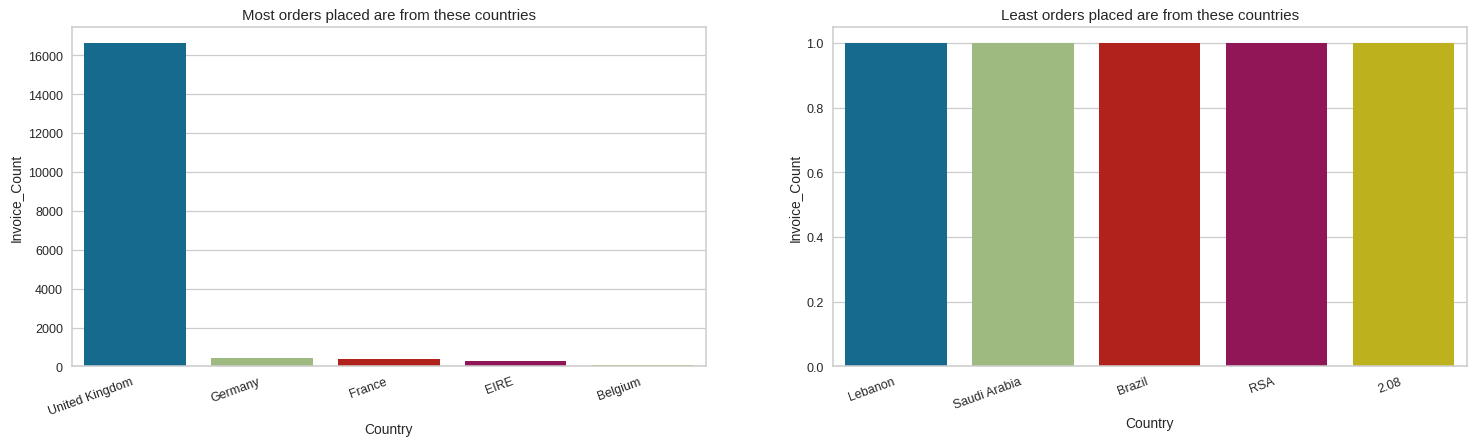

In [ ]:
# Visualizing top and bottom 10 countries based on total invoices 
plt.figure(figsize=(20,5),dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most orders placed are from these countries")
sns.barplot(data=country_invoice.head(5),x="Country",y="Invoice_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least orders placed are from these countries")
sns.barplot(data=country_invoice.tail(5),x="Country",y="Invoice_Count")
plt.show()

In [ ]:
# Most customers are from these countries
country_cust = df.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

Country  Customer_Count
36  United Kingdom            3920
15         Germany              94
14          France              87
31           Spain              30
4          Belgium              25

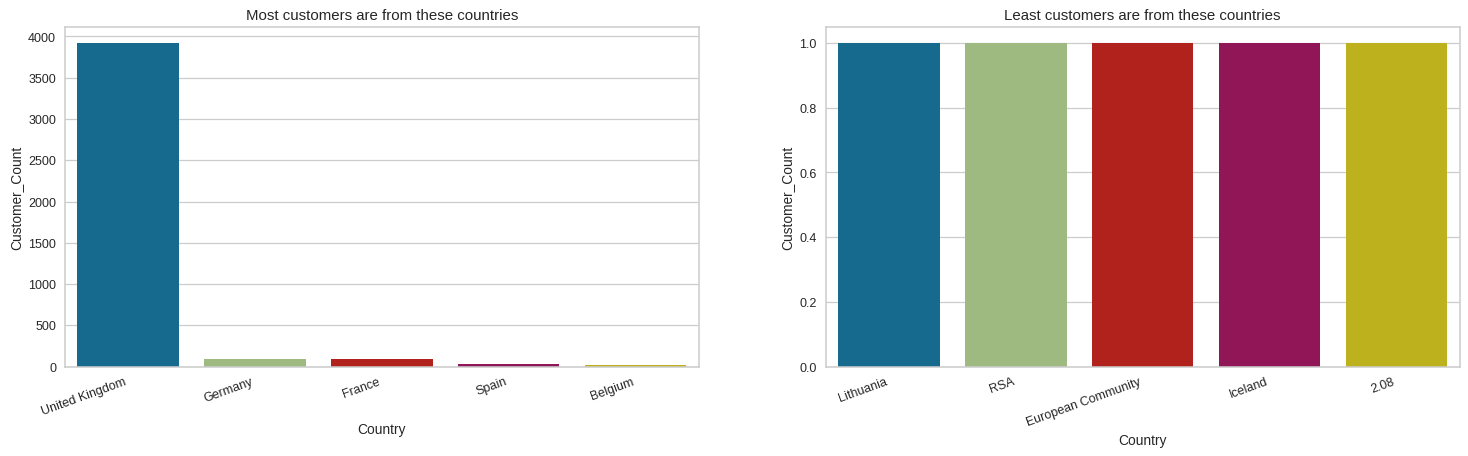

In [ ]:
# Visualizing top and bottom 10 countries based on total customers 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most customers are from these countries")
sns.barplot(data=country_cust.head(5),x="Country",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least customers are from these countries")
sns.barplot(data=country_cust.tail(5),x="Country",y="Customer_Count")
plt.show()

### **Quantity**

In [ ]:
df['Quantity'].nunique()

302

In [ ]:
# Countrywise average item purchases
country_quantity = df.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

Country  Average_Quantity
24     Netherlands         84.934718
20           Japan         81.046729
32          Sweden         80.173333
1        Australia         71.033870
9   Czech Republic         26.840000

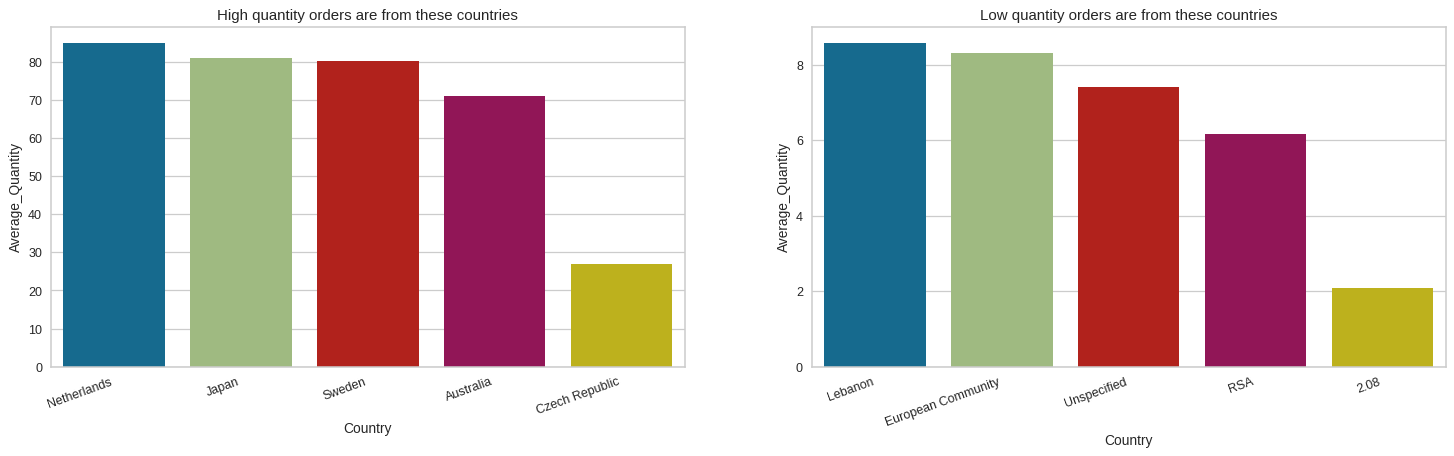

In [ ]:
# Visualizing top and bottom 10 countries based on average item purchases 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_quantity.head(5),x="Country",y="Average_Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Low quantity orders are from these countries")
sns.barplot(data=country_quantity.tail(5),x="Country",y="Average_Quantity")
plt.show()

In [ ]:
# quantity wise item purchases
product_quantity = df.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

Description  Quantity
2320         PAPER CRAFT , LITTLE BIRDIE   80995.0
1993      MEDIUM CERAMIC TOP STORAGE JAR   77916.0
3787   WORLD WAR 2 GLIDERS ASSTD DESIGNS   54319.0
1763             JUMBO BAG RED RETROSPOT   46078.0
3699  WHITE HANGING HEART T-LIGHT HOLDER   36706.0

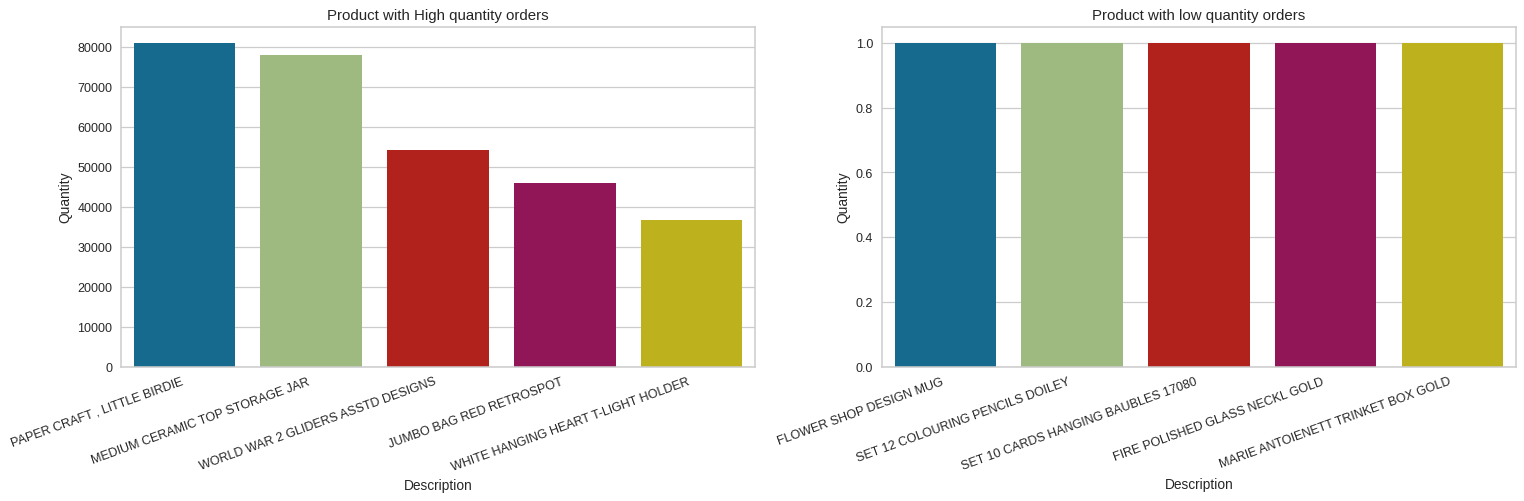

In [ ]:
# Visualizing top and bottom 10 products based on purchase quantity
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=product_quantity.head(5),x="Description",y="Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with low quantity orders")
sns.barplot(data=product_quantity.tail(5),x="Description",y="Quantity")
plt.show()

### **Product**

In [ ]:
df['Description'].nunique()

3878

In [ ]:
# Total Amount wise item purchases
product_price = df.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
product_price.head()

Description  TotalAmount
2320         PAPER CRAFT , LITTLE BIRDIE    168469.60
2768            REGENCY CAKESTAND 3 TIER    142264.75
3699  WHITE HANGING HEART T-LIGHT HOLDER    100392.10
1763             JUMBO BAG RED RETROSPOT     85040.54
1993      MEDIUM CERAMIC TOP STORAGE JAR     81416.73

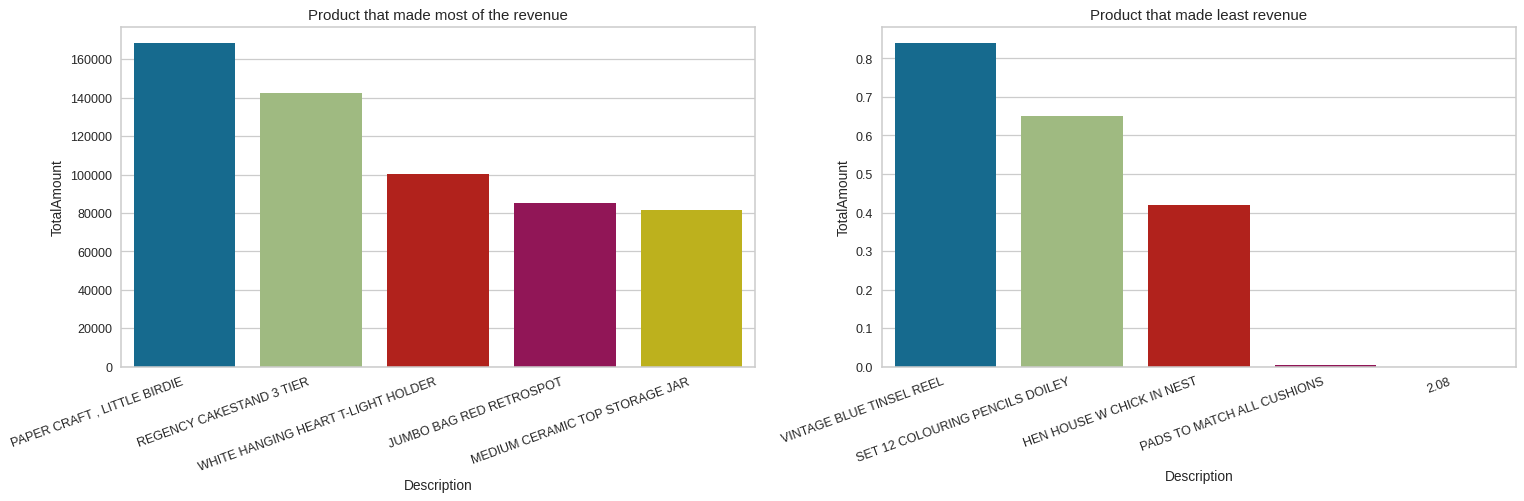

In [ ]:
# Visualizing top and bottom 10 products based on Total Amount
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=product_price.head(5),x="Description",y="TotalAmount")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made least revenue")
sns.barplot(data=product_price.tail(5),x="Description",y="TotalAmount")
plt.show()

In [ ]:
# customer wise item purchases
product_customer = df.groupby("Description").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
product_customer.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
product_customer.head()

Description  Customer_Count
2768            REGENCY CAKESTAND 3 TIER             881
3699  WHITE HANGING HEART T-LIGHT HOLDER             856
2346                       PARTY BUNTING             708
217        ASSORTED COLOUR BIRD ORNAMENT             678
3002   SET OF 3 CAKE TINS PANTRY DESIGN              640

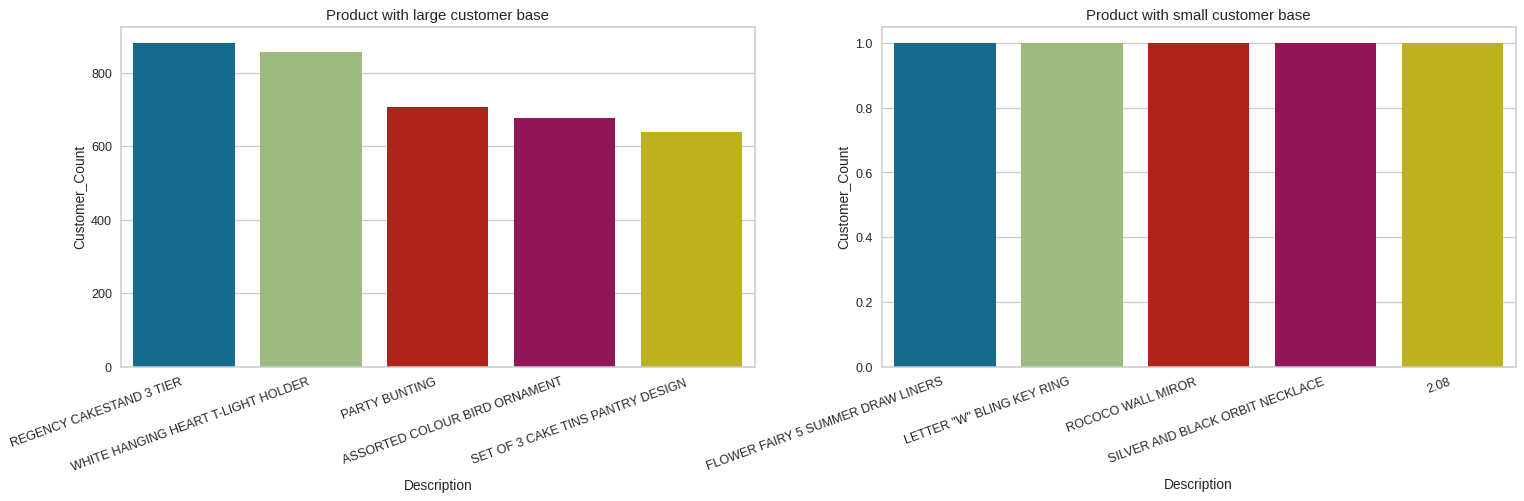

In [ ]:
# Visualizing top and bottom 10 products based on customers
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with large customer base")
sns.barplot(data=product_customer.head(5),x="Description",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with small customer base")
sns.barplot(data=product_customer.tail(5),x="Description",y="Customer_Count")
plt.show()

### **Time**

In [ ]:
df['Month'].unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [ ]:
month_invoice = df.groupby("Month").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)
month_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
month_invoice.head()

Month  Invoice_Count
9    November           2657
2    December           2178
10    October           1929
11  September           1755
8         May           1555

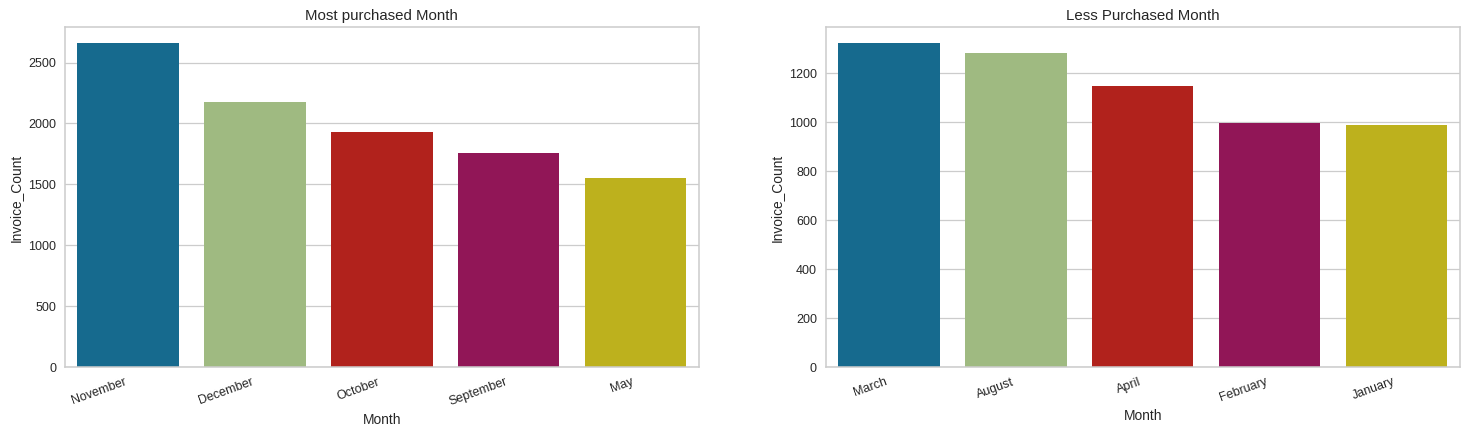

In [ ]:
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most purchased Month")
sns.barplot(data=month_invoice.head(5),x="Month",y="Invoice_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Less Purchased Month")
sns.barplot(data=month_invoice.tail(5),x="Month",y="Invoice_Count")
plt.show()

In [ ]:
df['Day'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

In [ ]:
# Most orders placed on these days
day_invoice = df.groupby("Day").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)
day_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
day_invoice.head()

Day  Invoice_Count
3   Thursday           4033
5  Wednesday           3455
4    Tuesday           3184
1     Monday           2863
0     Friday           2829

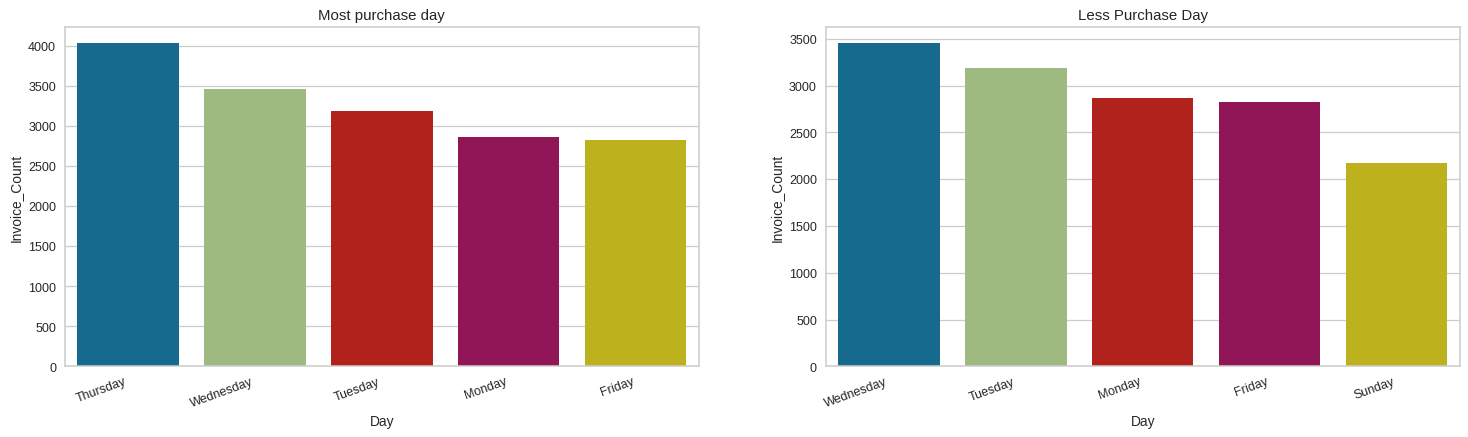

In [ ]:
# Visualizing top and bottom days based on purchase
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most purchase day")
sns.barplot(data=day_invoice.head(5),x="Day",y="Invoice_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Less Purchase Day")
sns.barplot(data=day_invoice.tail(5),x="Day",y="Invoice_Count")
plt.show()

In [ ]:
df['hour'].nunique()

16

In [ ]:
hour_invoice = df.groupby("hour").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)
hour_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
hour_invoice.head()

hour  Invoice_Count
7    12           3130
8    13           2636
6    11           2277
9    14           2274
5    10           2226

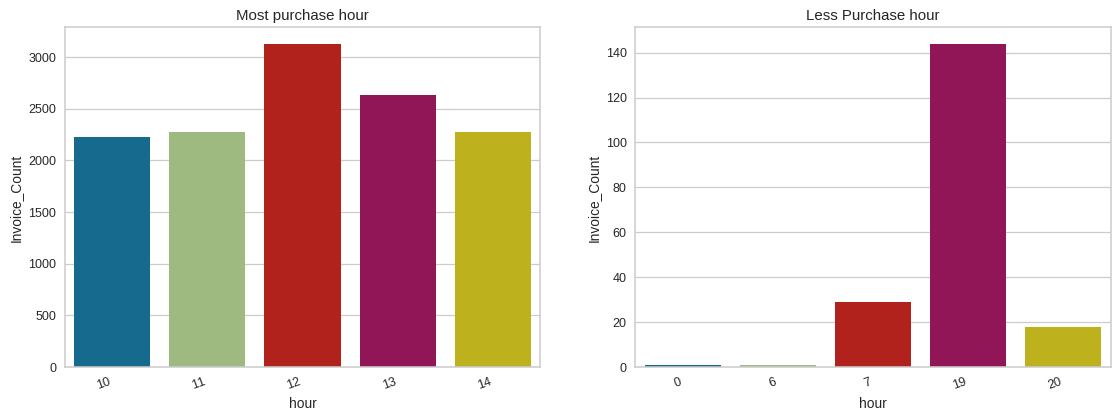

In [ ]:
plt.figure(figsize=(15,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most purchase hour")
sns.barplot(data=hour_invoice.head(5),x="hour",y="Invoice_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Less Purchase hour")
sns.barplot(data=hour_invoice.tail(5),x="hour",y="Invoice_Count")
plt.show()

### **Amount**

In [ ]:
df['TotalAmount'].max()

168469.6

In [ ]:
# Checking total amount spend by each customer. 
amount_df = df.groupby('CustomerID')['TotalAmount'].sum().reset_index().sort_values("TotalAmount",ascending=False)
amount_df.head()

CustomerID  TotalAmount
1690     14646.0    280206.02
4202     18102.0    259657.30
3729     17450.0    194390.79
3009     16446.0    168472.50
1880     14911.0    143711.17

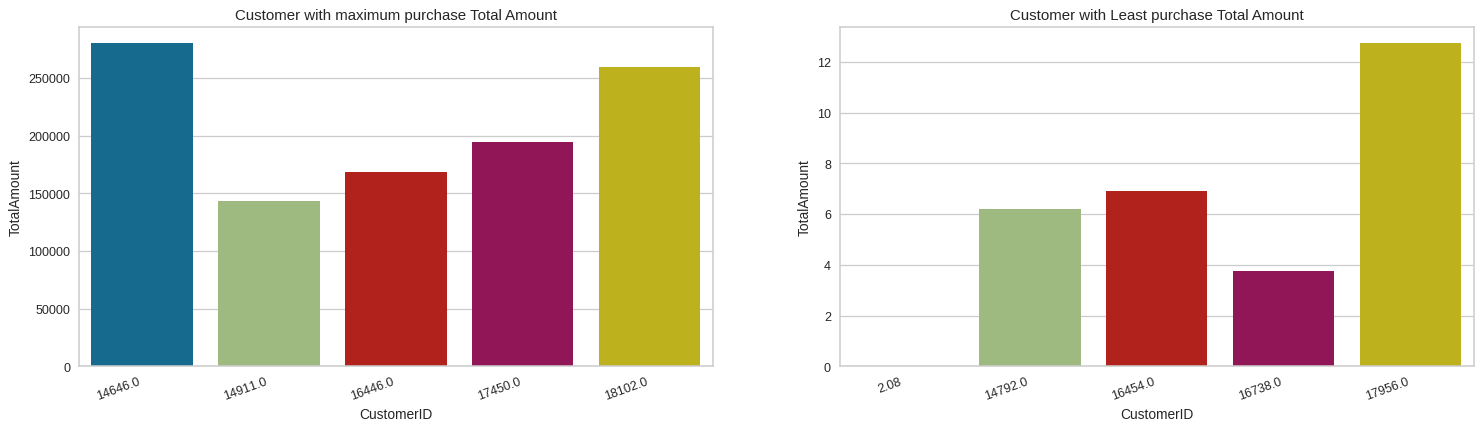

In [ ]:
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Customer with maximum purchase Total Amount")
sns.barplot(data=amount_df.head(5),x="CustomerID",y="TotalAmount")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Customer with Least purchase Total Amount")
sns.barplot(data=amount_df.tail(5),x="CustomerID",y="TotalAmount")
plt.show()

### **Cancellation**

In [ ]:
# Checking the number of cancellations by each customer. 
customer_cancellations = cancellations.groupby('CustomerID').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
customer_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
customer_cancellations.head()

CustomerID  Cancellations
736      14911.0            226
1485     17841.0            136
1397     17511.0            113
848      15311.0            112
89       12607.0            101

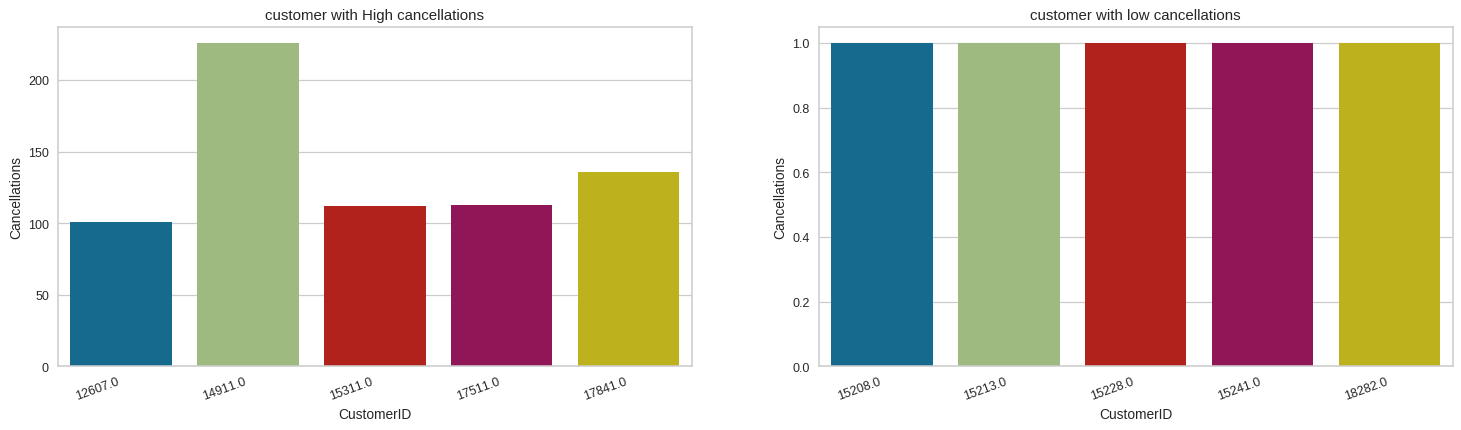

In [ ]:
# Visualizing top and bottom 10 customers based on cancellations 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("customer with High cancellations")
sns.barplot(data=customer_cancellations.head(5),x="CustomerID",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("customer with low cancellations")
sns.barplot(data=customer_cancellations.tail(5),x="CustomerID",y="Cancellations")
plt.show()

In [ ]:
# Checking the number of cancellations countrywise. 
country_cancellations = cancellations.groupby('Country').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
country_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
country_cancellations.head()

Country  Cancellations
27  United Kingdom           7501
11         Germany            453
7             EIRE            247
10          France            148
26             USA            112

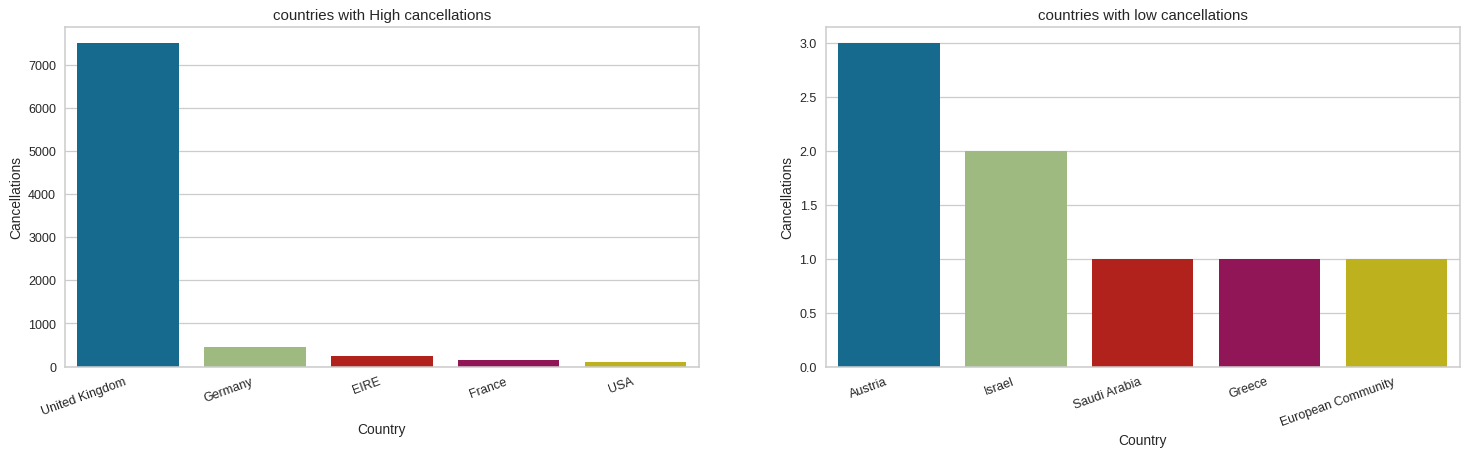

In [ ]:
# Visualizing top and bottom 10 countries based on cancellations 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("countries with High cancellations")
sns.barplot(data=country_cancellations.head(5),x="Country",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("countries with low cancellations")
sns.barplot(data=country_cancellations.tail(5),x="Country",y="Cancellations")
plt.show()

### What all manipulations have you done and insights you found?


1.   Most Customers are from United Kingdom.
2.   Considerable number of customers are also from Germany, France, EIRE and Spain. Whereas Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania has least number of customers

1.   There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.
2.   
Most of the customers have purchased the gifts in the month of November, October, December and September.

1.   Less number of customers have purchased the gifts in the month of April, January and February.
2.   Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and the least in Evening.

1.   WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products













# **4. Feature Engineering**

### **Target variables**

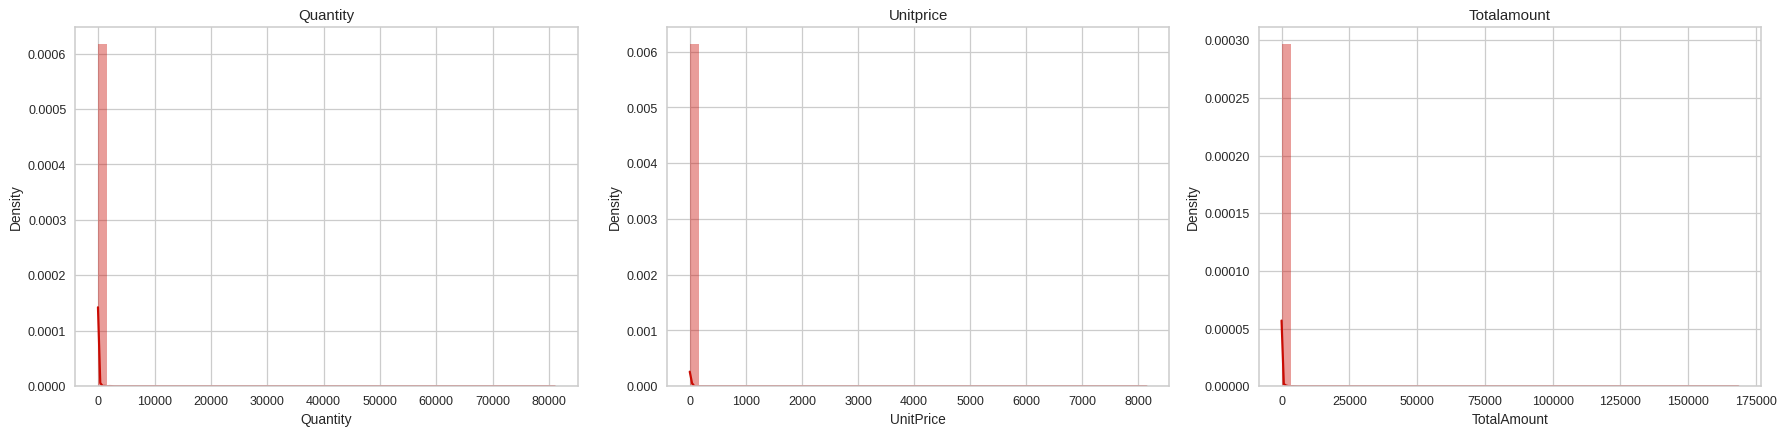

In [ ]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(df[col],color='r')
  plt.title(col.title())
  plt.tight_layout()

Observation:

It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode
For symmetric graph mean=median=mode.

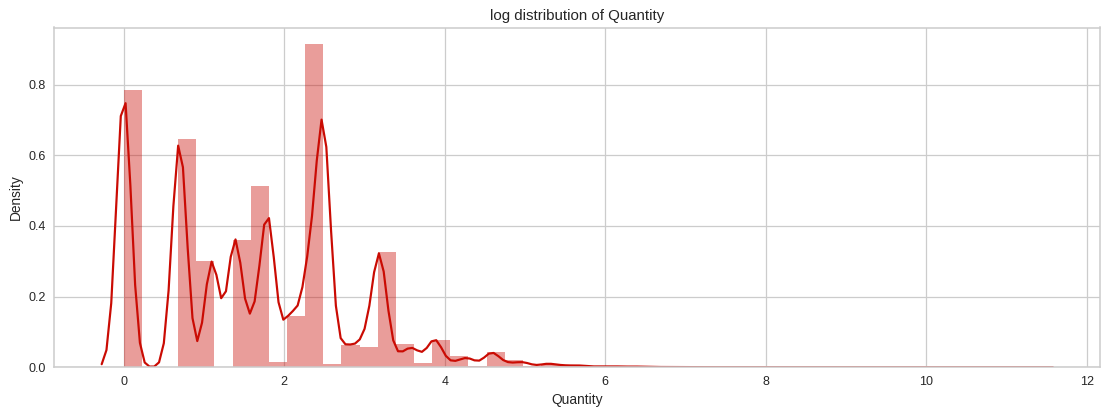

In [ ]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(15,5), dpi=90)
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color='r')
plt.show()

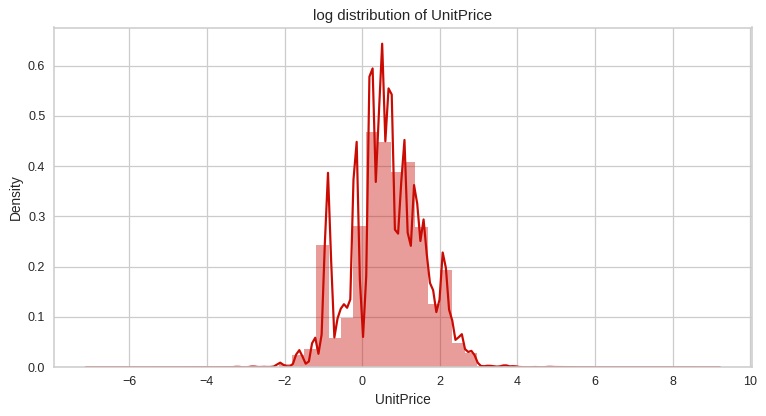

In [ ]:
plt.figure(figsize=(10,5), dpi=90)
plt.title('log distribution of UnitPrice')
sns.distplot(np.log(df['UnitPrice']),color='r')
plt.show()

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country  year     Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010  December   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010  December   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010  December   

         Day  hour  TotalAmount TimeType  
0  Wednesday     8        15.30  Morning  
1  Wednesday     8        20.34  Morning  
2  Wednesday     8        22.00  Morning  
3  Wednesday     8        20.34  Morning  
4  Wednesday     8        20.34  Morning

### **Categorical Encoding**

In [ ]:
# Encode your categorical columns

days= {'Sunday':7,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

def get_days(x):
  return days[x]

In [ ]:
df['Day']=df['Day'].apply(lambda x : get_days(x))

In [ ]:
# Encode your categorical columns

months= {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

def get_month(x):
  return months[x]

In [ ]:
df['Month']=df['Month'].apply(lambda x : get_month(x))

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country  year  Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010     12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010     12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   

   Day  hour  TotalAmount TimeType  
0    3     8        15.30  Morning  
1    3     8        20.34  Morning  
2    3     8        22.00  Morning  
3    3     8        20.34  Morning  
4    3     8        20.34  Morning

# **5. RFM Model Analysis:**

RFM is a method used to analyze customer value. RFM stands for RECENCY, Frequency, and Monetary.

**RECENCY:** How recently did the customer visit our website or how recently did a customer purchase?

**Frequency:** How often do they visit or how often do they purchase?

**Monetary:** How much revenue we get from their visit or how much do they spend when they purchase?

RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors RECENCY, Frequency, and Monetary.

The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.

In [ ]:
df.drop([622], axis=0, inplace=True)

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

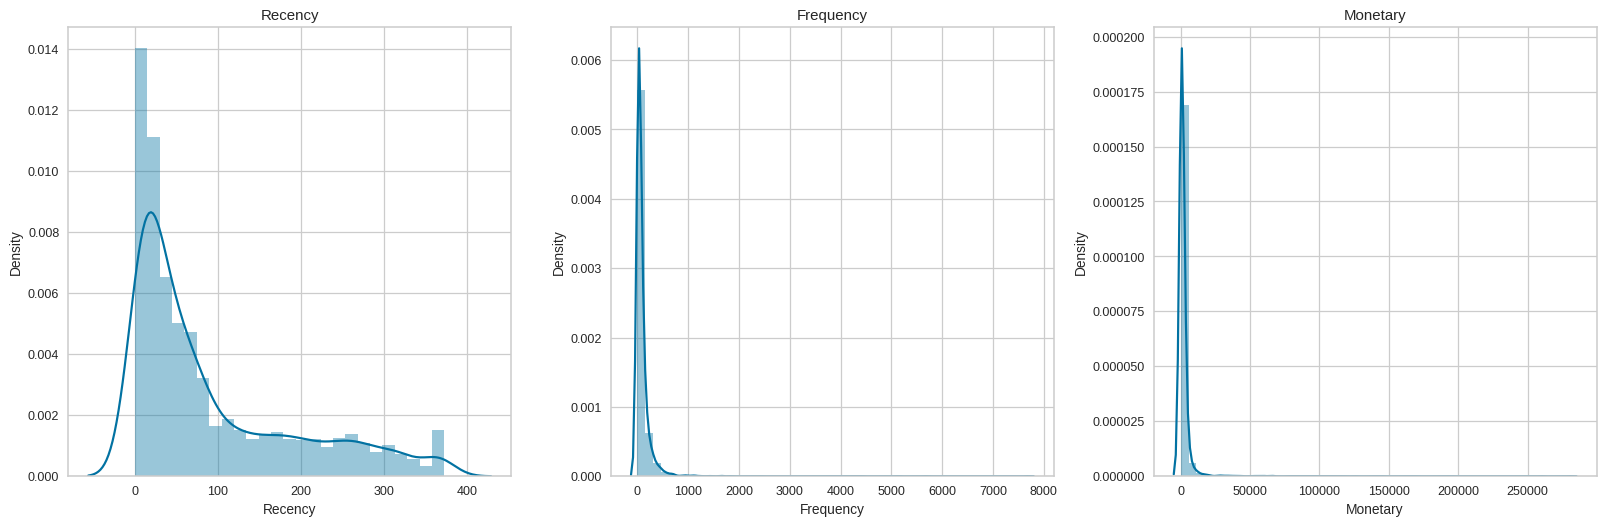

In [ ]:
# Visualizing the distributions before log transformation.
target = ['Recency', 'Frequency',	'Monetary']
plt.figure(figsize=(18,6), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(rfm_df[col])
  plt.title(col.title())
  plt.tight_layout()

**Observation:**

Frequency and Monetary variables have highly right skewed distribution. while Recency has moderate right skewness



In [ ]:
# Split the data into four segment using Quantile
quantile = rfm_df.quantile(q = [0.25,0.50,0.75])


In [ ]:
 #Converting quantiles to a dictionary, easier to use.
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.48249999999996,
  0.5: 668.5700000000002,
  0.75: 1660.5974999999999}}

In [ ]:
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company



def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1                               
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

        # arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
        # higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
# # this code was for understanding the above code function
# if 18 <= quantile['Recency'][0.25]:
#   print(1)
# else:
#   print('Great')     

In [ ]:
# Calculating and adding R,F and M segments values columns in the existing dataset to show R,F,M segment values
rfm_df["R"] = rfm_df['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_df["F"] = rfm_df['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_df["M"] = rfm_df['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [ ]:
# Add a new column to combine RFM score
rfm_df['RFM_Group'] = rfm_df.R.map(str)+rfm_df.F.map(str)+rfm_df.M.map(str)

In [ ]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFM_Score'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score
CustomerID                                                            
12346.0         325          1  77183.60  4  4  1       441          9
12347.0           2        182   4310.00  1  1  1       111          3
12348.0          75         31   1797.24  3  3  1       331          7
12349.0          18         73   1757.55  2  2  1       221          5
12350.0         310         17    334.40  4  4  3       443         11

In [ ]:
rfm_df['RFM_Score'].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10])

In [ ]:
# Assign Loyelty Level to each customer

Loyalty_Level = ['Platinaum','Gold','Silver','Bronz']

Score_cut = pd.qcut(rfm_df['RFM_Score'],q = 4,labels=Loyalty_Level)
rfm_df['RFM_Loyalty_Level'] = Score_cut.values
rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     12346.0      325          1  77183.60  4  4  1       441          9   
1     12347.0        2        182   4310.00  1  1  1       111          3   
2     12348.0       75         31   1797.24  3  3  1       331          7   
3     12349.0       18         73   1757.55  2  2  1       221          5   
4     12350.0      310         17    334.40  4  4  3       443         11   

  RFM_Loyalty_Level  
0            Silver  
1         Platinaum  
2              Gold  
3         Platinaum  
4             Bronz

In [ ]:
# Validate the data For RFM group = 111
rfm_df[rfm_df['RFM_Group'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency   Monetary  R  F  M RFM_Group  RFM_Score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        336  194390.79  1  1  1       111          3   
3     14911.0        1       5670  143711.17  1  1  1       111          3   
4     14156.0        9       1395  117210.08  1  1  1       111          3   
5     17511.0        2        963   91062.38  1  1  1       111          3   
6     16684.0        4        277   66653.56  1  1  1       111          3   
7     14096.0        4       5111   65164.79  1  1  1       111          3   
8     13694.0        3        568   65039.62  1  1  1       111          3   
9     15311.0        0       2366   60632.75  1  1  1       111          3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

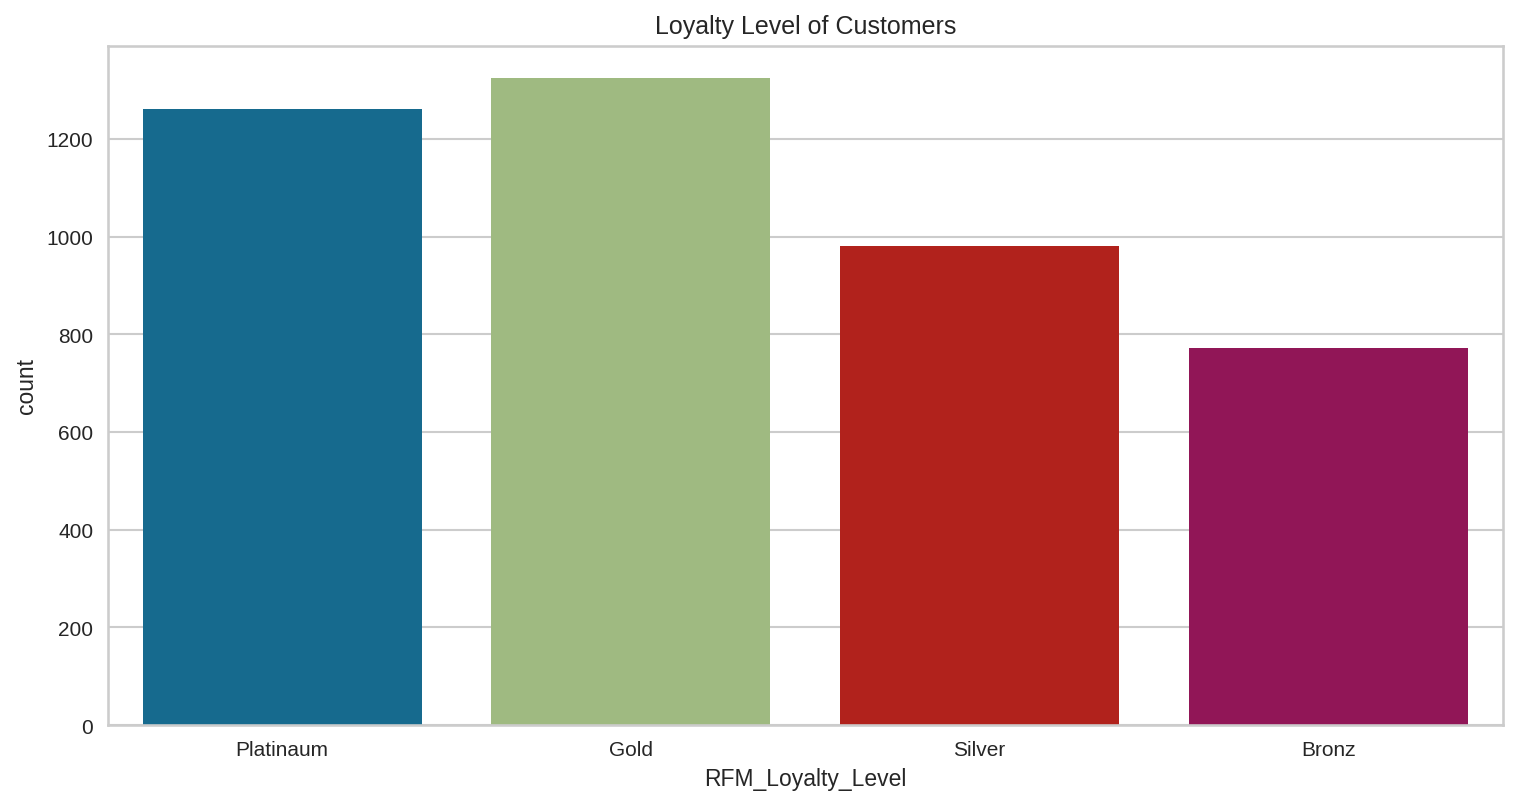

In [ ]:
# Plot the loyelty level
plt.figure(figsize=(12,6))
sns.countplot(rfm_df['RFM_Loyalty_Level'])
plt.title('Loyalty Level of Customers')
plt.show()

In [ ]:
#Folowing table contains our target peoples
rfm_df[rfm_df['RFM_Loyalty_Level'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency   Monetary  R  F  M RFM_Group  RFM_Score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        336  194390.79  1  1  1       111          3   
3     14911.0        1       5670  143711.17  1  1  1       111          3   
4     12415.0       24        714  124914.53  2  1  1       211          4   
5     14156.0        9       1395  117210.08  1  1  1       111          3   
6     17511.0        2        963   91062.38  1  1  1       111          3   
7     16029.0       38        241   80850.84  2  1  1       211          4   
8     16684.0        4        277   66653.56  1  1  1       111          3   
9     14096.0        4       5111   65164.79  1  1  1       111          3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

In [ ]:
segmentation_based_on_RFM=rfm_df[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]

In [ ]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency               Monetary  \
                         mean min  max        mean min   max         mean   
RFM_Loyalty_Level                                                           
Platinaum           19.550357   0  140  225.884219  20  7676  5253.556788   
Gold                63.433962   0  372   57.012075   1   521  1162.987662   
Silver             125.178571   1  373   24.337755   1    98   579.452461   
Bronz              217.585492  51  373   10.958549   1    39   199.030725   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinaum          316.25  280206.02  1261  
Gold               114.34  168472.50  1325  
Silver               6.90   77183.60   980  
Bronz                3.75     660.00   772

**Observation:**

Platinum Customer Count is 1261.

Gold Customer Count is 1325.

Silver Customer Count is 980.
 
Bronz Customer count is 772.

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

In [ ]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_rfm_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [ ]:
import math

In [ ]:
# Creating Features with Log Transformation

rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [ ]:
rfm_df

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   
...             ...        ...       ... .. .. ..       ...        ...   
18280.0         277         10    180.60  4  4  4       444         12   
18281.0         180          7     80.82  4  4  4       444         12   
18282.0           7         12    178.05  1  4  4       144          9   
18283.0           3        721   2045.53  1  1  1       111          3   
18287.0          42         70   1837.28  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  
CustomerID                                                              
12346.0               Silver     5.783825       0.000000     11.253942  
12347.0            Platinaum     0.693147       5.204007      8.368693  
12348.0                 Gold     4.317488       3.433987      7.494007  
12349.0            Platinaum     2.890372       4.290459      7.471676  
12350.0                Bronz     5.736572       2.833213      5.812338  
...                      ...          ...            ...           ...  
18280.0                Bronz     5.624018       2.302585      5.196285  
18281.0                Bronz     5.192957       1.945910      4.392224  
18282.0               Silver     1.945910       2.484907      5.182064  
18283.0            Platinaum     1.098612       6.580639      7.623412  
18287.0            Platinaum     3.737670       4.248495      7.516041  

[4338 rows x 12 columns]

In [ ]:
# Checking Descriptive Stats
rfm_df.describe()

Recency    Frequency       Monetary            R            F  \
count  4338.000000  4338.000000    4338.000000  4338.000000  4338.000000   
mean     92.067543    90.523744    2048.688081     2.494237     2.511987   
std     100.004876   225.506968    8985.230220     1.122059     1.122626   
min       1.000000     1.000000       3.750000     1.000000     1.000000   
25%      17.000000    17.000000     306.482500     1.000000     2.000000   
50%      50.000000    41.000000     668.570000     2.000000     3.000000   
75%     141.750000    98.000000    1660.597500     3.750000     4.000000   
max     373.000000  7676.000000  280206.020000     4.000000     4.000000   

                 M    RFM_Score  Recency_log  Frequency_log  Monetary_log  
count  4338.000000  4338.000000  4338.000000    4338.000000   4338.000000  
mean      2.500000     7.506224     3.737133       3.671522      6.585704  
std       1.118369     2.814712     1.474603       1.320854      1.261763  
min       1.000000     3.000000     0.000000       0.000000      1.321756  
25%       1.250000     5.000000     2.833213       2.833213      5.725161  
50%       2.500000     8.000000     3.912023       3.713572      6.505141  
75%       3.750000    10.000000     4.954060       4.584967      7.414933  
max       4.000000    12.000000     5.921578       8.945854     12.543280

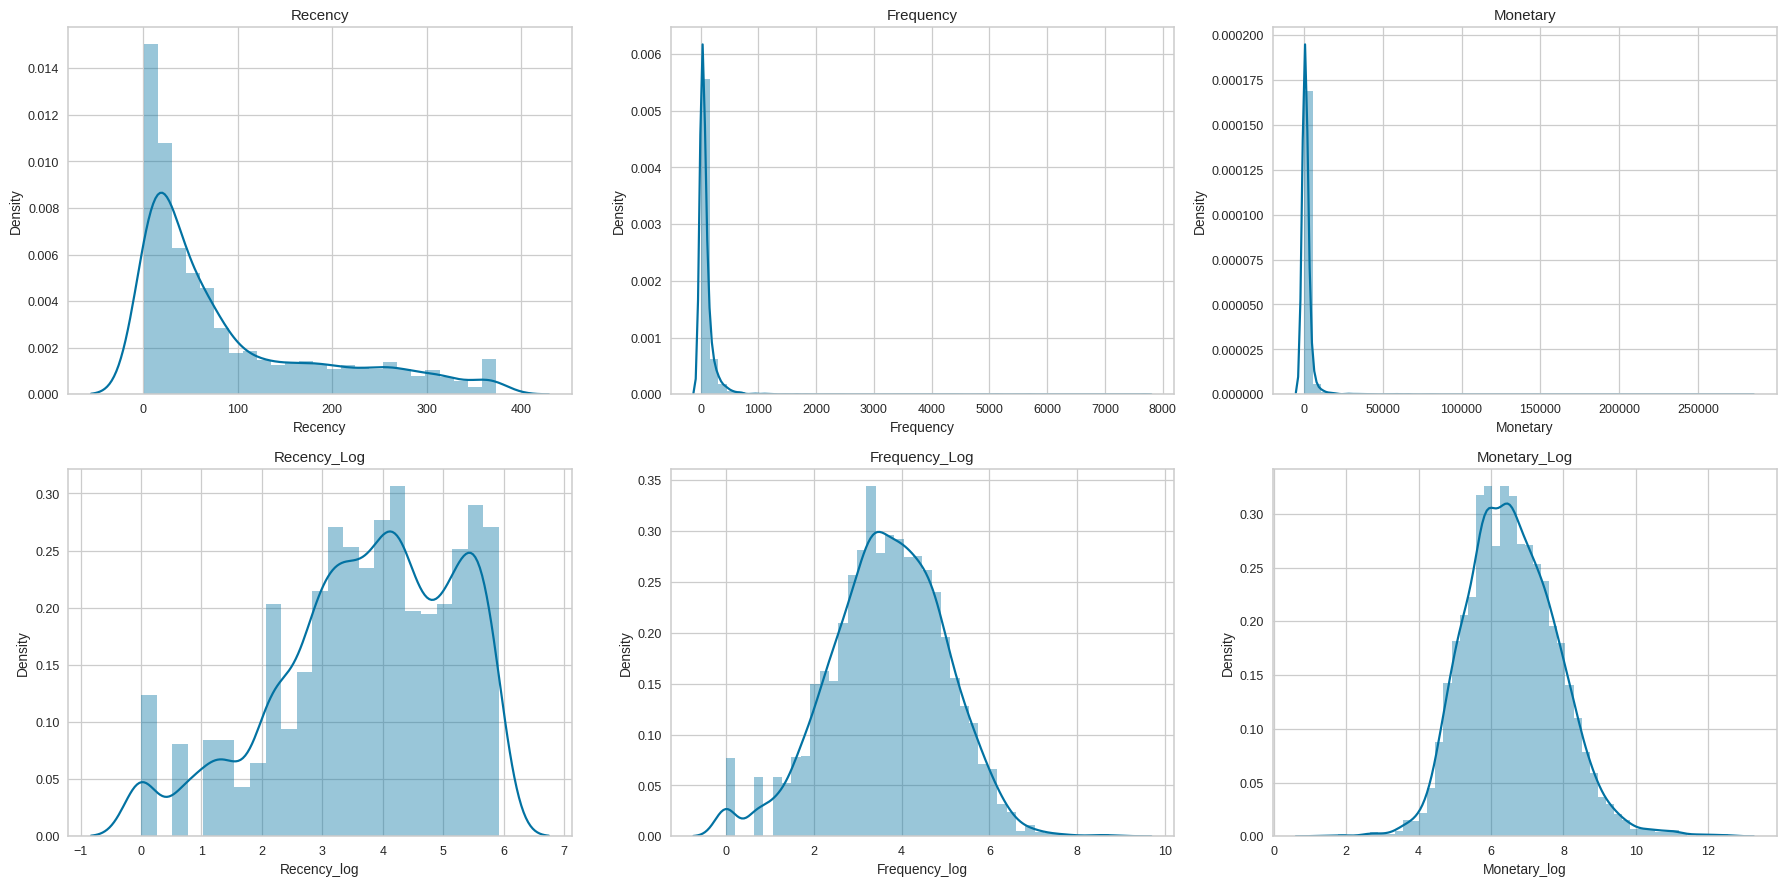

In [ ]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_log', 'Frequency_log', 'Monetary_log']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm_df[col])
  plt.title(col.title())
  plt.tight_layout()

### **After Log transaformation the variable are now normally distributed and Hence its ready for model implementation**

### **Correlation between variables in RFM dataframe**

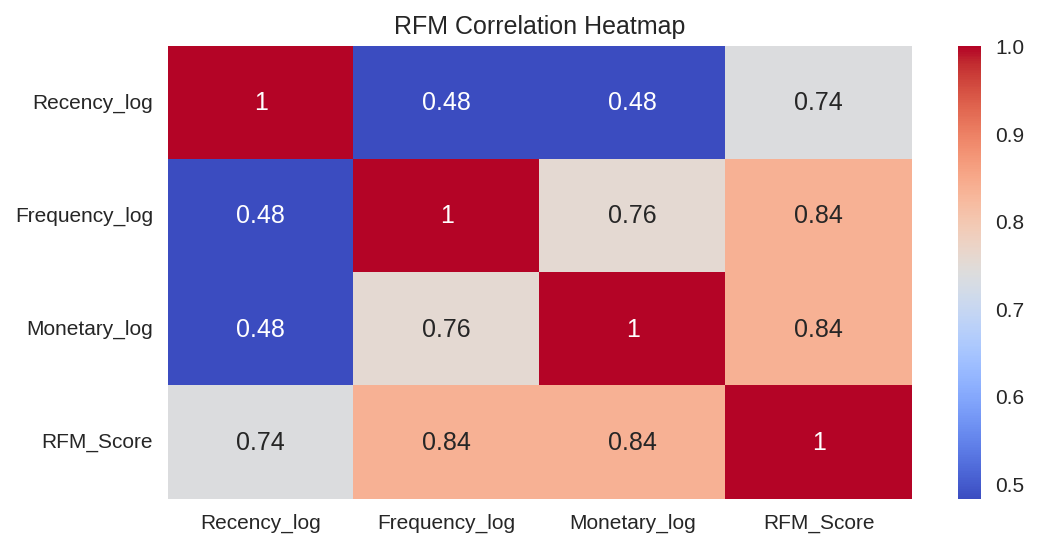

In [ ]:
# Visualizing the correlations among features.
target = ['Recency_log','Frequency_log','Monetary_log','RFM_Group','RFM_Score']
plt.figure(figsize = (8, 4), dpi=150)
sns.heatmap(abs(rfm_df[target].corr()), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

# **6. ML Model Implementation**

## **Pre-Processing**

In [ ]:
# Defining X Variables
X = rfm_df[['Recency_log','Frequency_log','Monetary_log']]
X = StandardScaler().fit_transform(X)

In [ ]:
# Initializing an empty dictionary to store the stats and summary for all clusters 
conclusion={}

# Definin a function to remove the outliers
def cap_outliers(col,overlap_supress):
  '''
    Takes a column and removes the outliers based on the overlap_supress value
    col: column to be cleaned
    overlap_supress: value to be used to remove the outliers
    Type:
    col: pandas.Series
    overlap_supress: float

    Returns:Capped column with outliers removed
  '''
  condition1=col < col.quantile(1-overlap_supress)
  condition2=col > col.quantile(overlap_supress)
  return col[condition1 & condition2]

# Function for displaying the stats of Recency, Frequency and Monetary for each group
def cluster_stats(data, segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame
    Features:This function prints the mean median and count of Recency, Frequency and Monetary for each group
    This function prints 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  '''
  # Storing the mean median and count of Recency, Frequency and Monetary for each group
  stats = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median'])
  stats['Count'] = data[segment_name].value_counts()

  # Storing 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  summary = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg({
          "Recency"   :lambda x : f'{int(x.quantile(0.25))} to {int(x.quantile(0.75))} days ago',
          "Frequency" :lambda x : f"Bought {int(x.quantile(0.25))} to {int(x.quantile(0.75))} times",
          "Monetary"  :lambda x : f"Spent around {int(x.quantile(0.25))} to {int(x.quantile(0.75))} Sterling"})
  
  # Changing the name for the columns 
  stats.columns = [f'{i}_{j}' for i, j in stats.columns]
  summary.columns=["Last_visited",'Purchase_frequency',"Money_spent"]

  return stats, summary

# Defining a function for plotting clusters for Visualization
def plots_stats_summary(y, segment_name, title, overlap_supress=0.2):
  '''
  Arguments:
    Type:y: pandas.Series
    Type:title: str
    Type:segment_name: str
    Type:overlap_supress: float
  Returns: Array of DataFrames
  features:This function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats
  '''
  rfm_df[segment_name] = y                                               # Copying segment values to main data frame
  groups = sorted(rfm_df[segment_name].unique())                         # store legends for features.
  # Calling the cluster_stats Function and saving outputs into variable
  stats, summary = cluster_stats(rfm_df,segment_name) 

  # PART 1 : Visyualizing the scatter plots for all clusters
  plt.figure(figsize = (18, 6), dpi=90)                               # Setting the size of the figure
  ax = plt.axes(projection ="3d")                                     # initializing axes
  ax.set_xlabel('Recency', fontweight ='bold')                        # Setting X label
  ax.set_ylabel('Frequency', fontweight ='bold')                      # Setting Y label
  ax.set_zlabel('Monetary', fontweight ='bold')                       # Setting Z label
  ax.set_title(title, fontweight ='bold')                             # Setting main title
  ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, cmap='viridis')     # Plotting scatter plot in 3 dimensions
  plt.legend(*ax.legend_elements(),prop={'size': 15})                 # positioning legend

  # PART 2 : Plotting the distribution
  fig,ax = plt.subplots(3,figsize=(18, 18), dpi=90)                  # Setting the size of the figure
  # Running a for loop for iterating through the number of clusters
  for i in groups:
    # Running a for loop for iterating through columns
    for index, col in enumerate(["Recency", "Frequency", "Monetary"]):
      # Plotting distributions of Recency, Frequency and Monetary
      sns.distplot(cap_outliers(rfm_df[rfm_df[segment_name]==i][col], overlap_supress),ax=ax[index] ,kde_kws=dict(linewidth=5))
      ax[index].set_title(f'{col} Distribution', fontweight ='bold')  # Setting the main title
      ax[index].legend(groups,prop={'size': 15})                      # Assiging legends for all the axes
  plt.show()

  # PART 3 : # Displaying the stats and summary
  # Displaying the mean median and count of Recency, Frequency and Monetary for each group
  print('\n\nDisplaying the mean median and count of Recency, Frequency and Monetary for each group with the description:\n')
  display(stats.reset_index().style.hide_index().background_gradient(cmap="plasma"))
  display(summary.reset_index().style.set_properties(**{'text-align': 'left'}).hide_index().background_gradient(cmap="plasma"))

  return stats, summary

## **Binning RFM_Score**

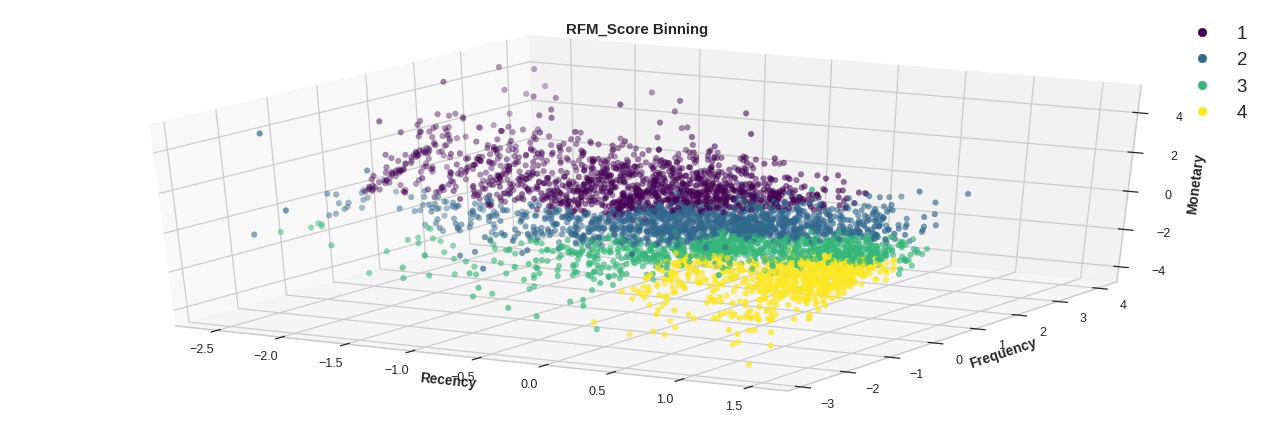

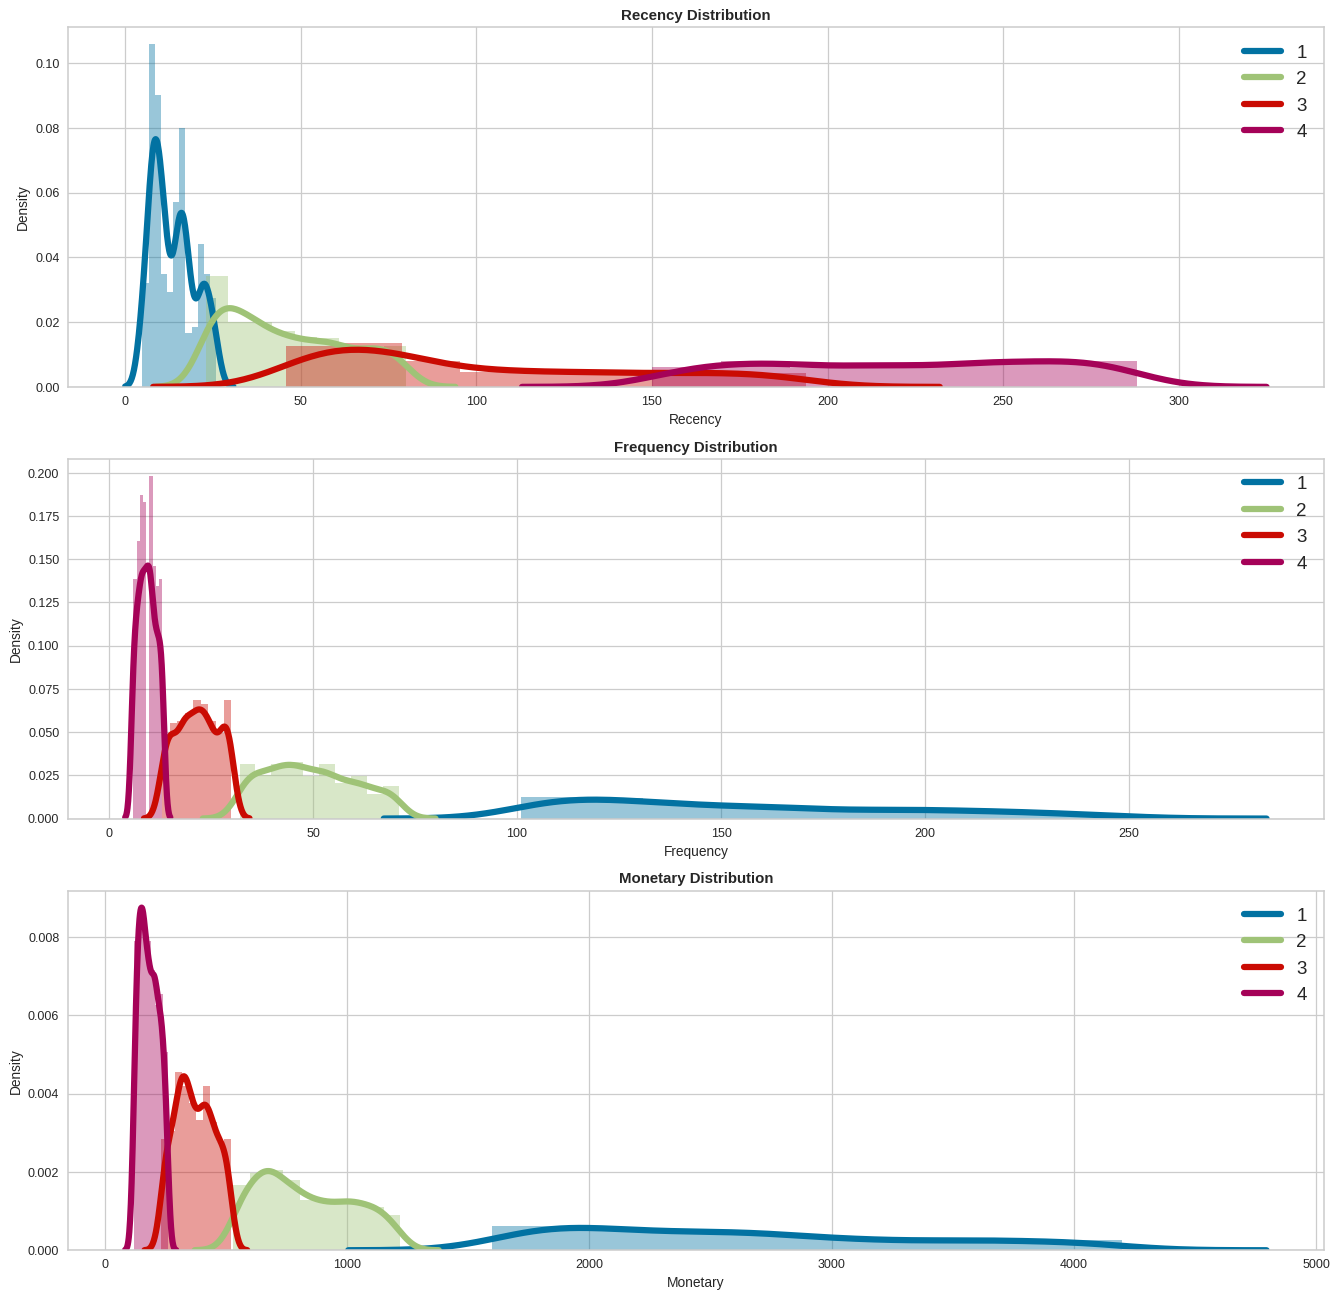



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Splitting RFM_Score in 4 bins based on quantiles
y = pd.qcut(rfm_df['RFM_Score'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM_Score Binning'
segment_name = 'Binning'
overlap_supress = 0.25
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

## **Quantile Based Clustering**

In [ ]:
rfm_df['RFM_Group']=rfm_df['RFM_Group'].apply(lambda x:int(x))

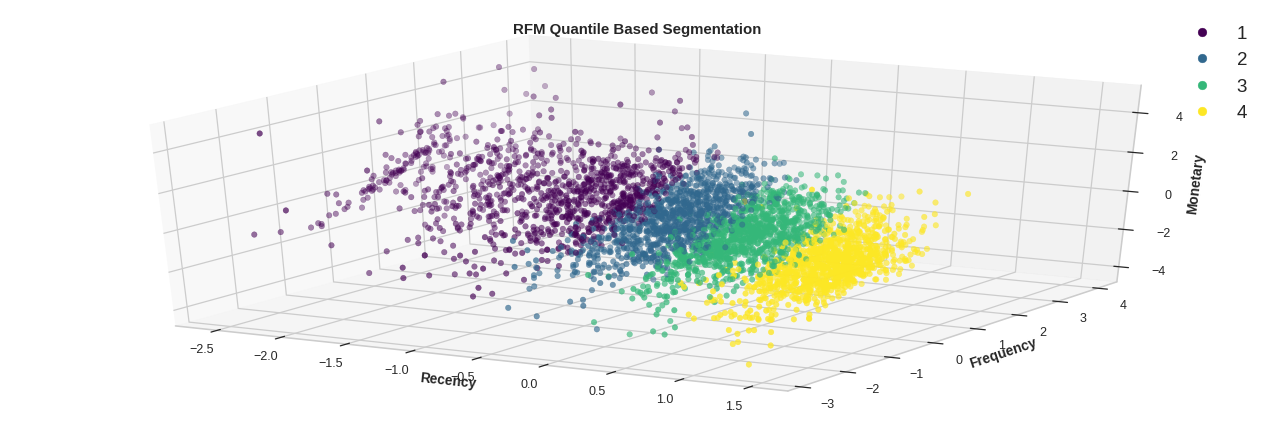

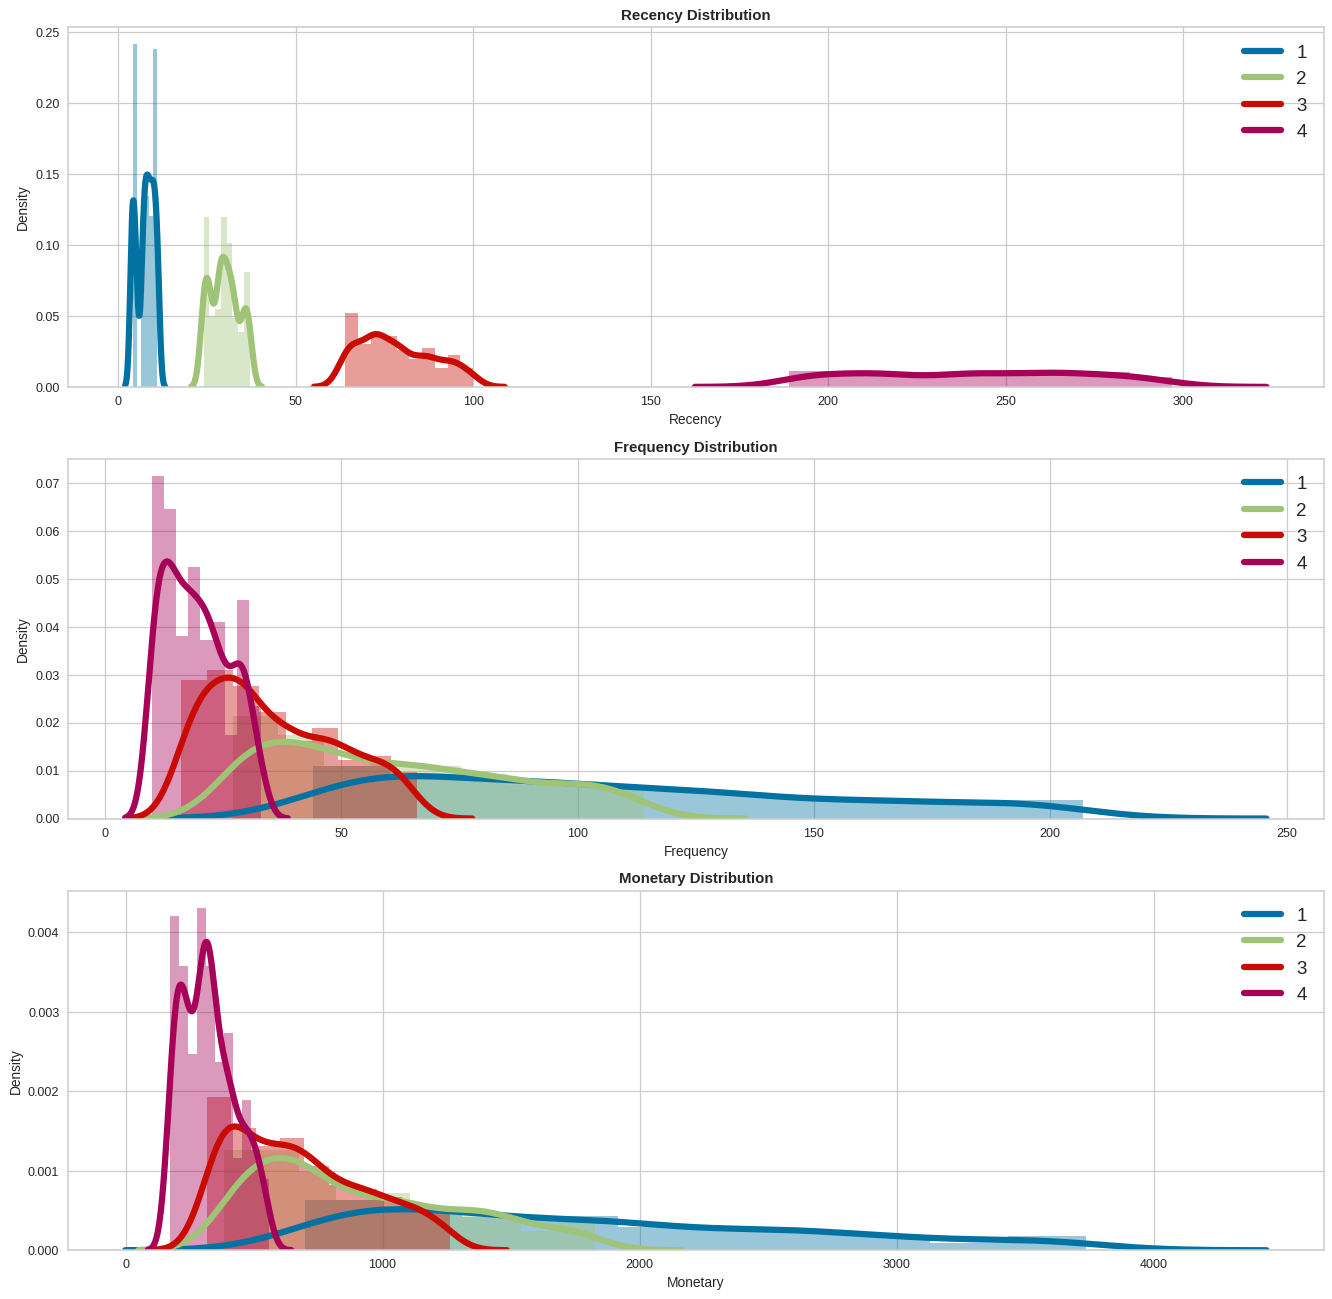



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Splitting RFM in 4 segments based on quantiles to obtain segments
y = pd.qcut(rfm_df['RFM_Group'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM Quantile Based Segmentation'
segment_name = 'QuantileCut'
overlap_supress = 0.25
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

## **K-Means Clustering**

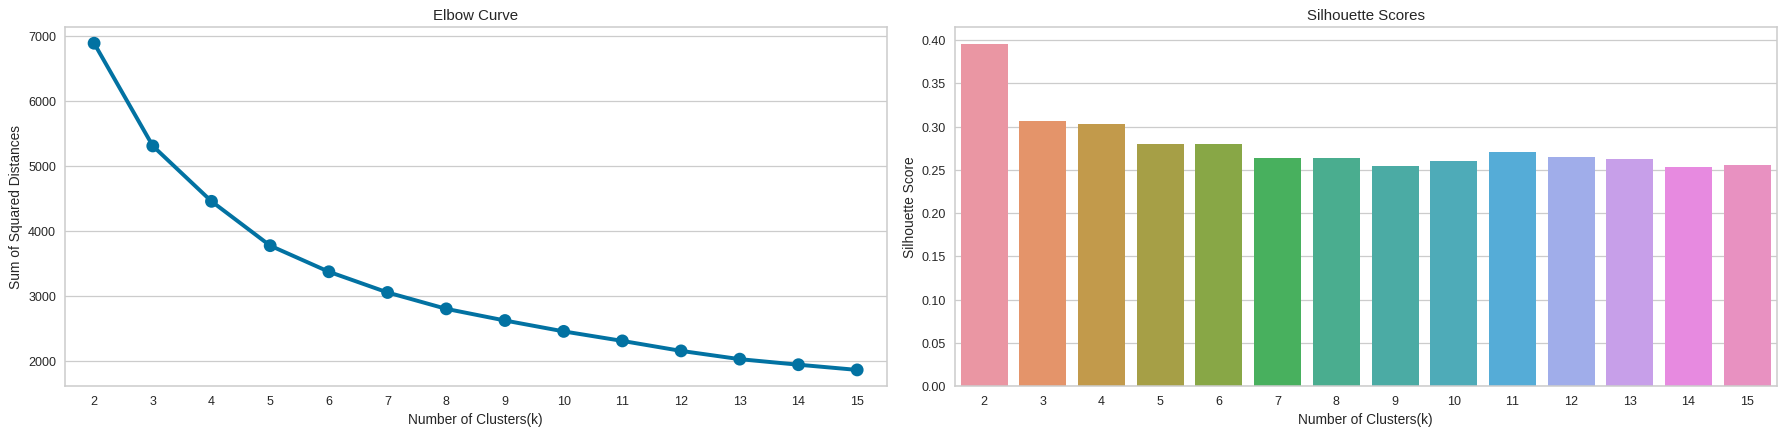

In [ ]:
# Storing sum of squared distances and Silhouette Scores for each value of k in k means clusterer
ssd,score = [],[]
# Setting figure Size
plt.figure(figsize=(20,5), dpi=90)

# Initializing the list of clusters for tuning the best clusters
n_clusters = list(range(2,16))

# Running a for loop of Kmeans algorithm
for k in n_clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)                                          # Fitting the model
    ssd.append(clusterer.inertia_)                                              # Appending the inertia
    score.append(silhouette_score(X, y_preds))                                  # Appending the silhoutte score

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)                                                            #Initializing subplots
sns.pointplot(x=n_clusters, y=ssd)                                              # plotting point plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Sum of Squared Distances')                                          # Setting y label
plt.title('Elbow Curve')                                                        # Setting the title

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)                                                            #Initializing subplots
sns.barplot(x=n_clusters, y=score)                                              # plotting bar plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Silhouette Score')                                                  # Setting y label
plt.title('Silhouette Scores')                                                  # Setting the title
plt.tight_layout()

Observations:

From the Elbow curve 5 appears to be at the elbow and hence can be considered as the number of clusters. n_clusters=4 or 6 can also be considered based of the objective of segmentation.
If we go by maximum Silhouette Score as the criteria for selecting optimal number of clusters, then n_clusters=2 can be chosen.
If we look at both of the graphs at the same time to decide the optimal number of clusters, we can take the intersection of set of good n_clusters obtained from both the graphs. So 4 appears to be a good choice, having a decent Silhouette score as well as near the elbow of the elbow curve.

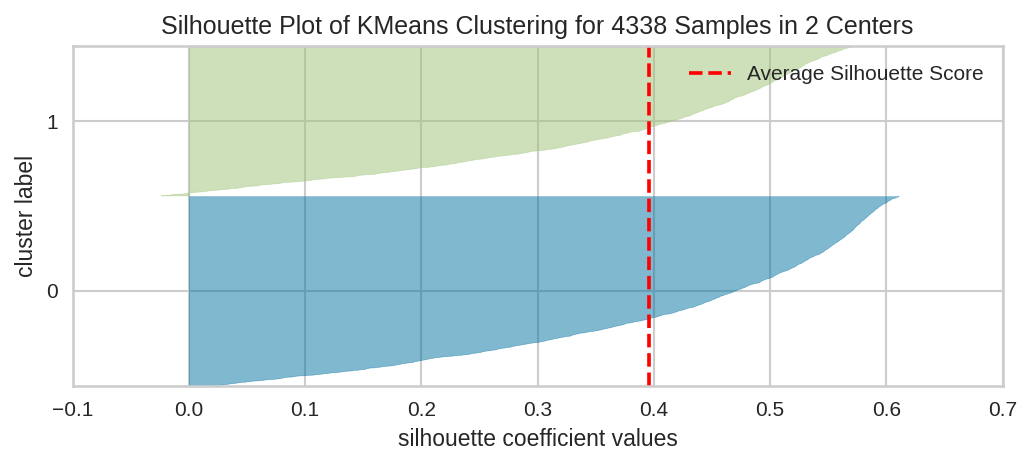

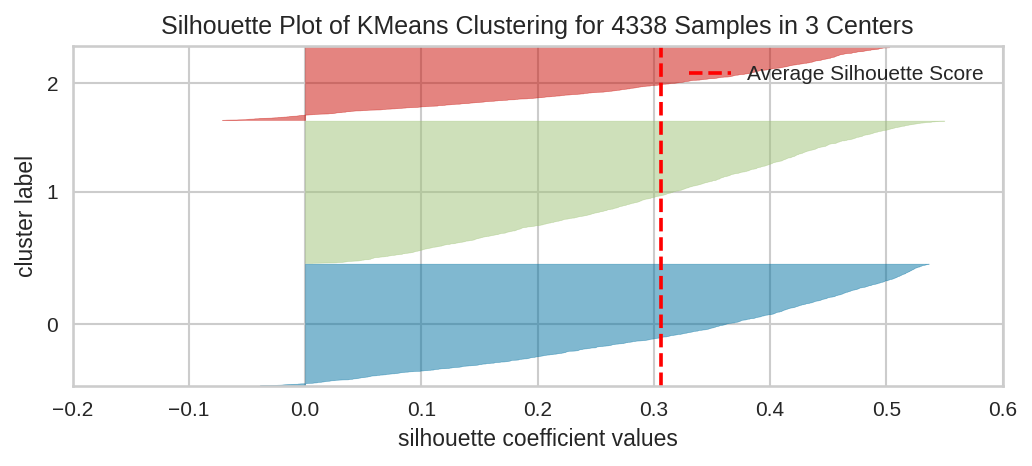

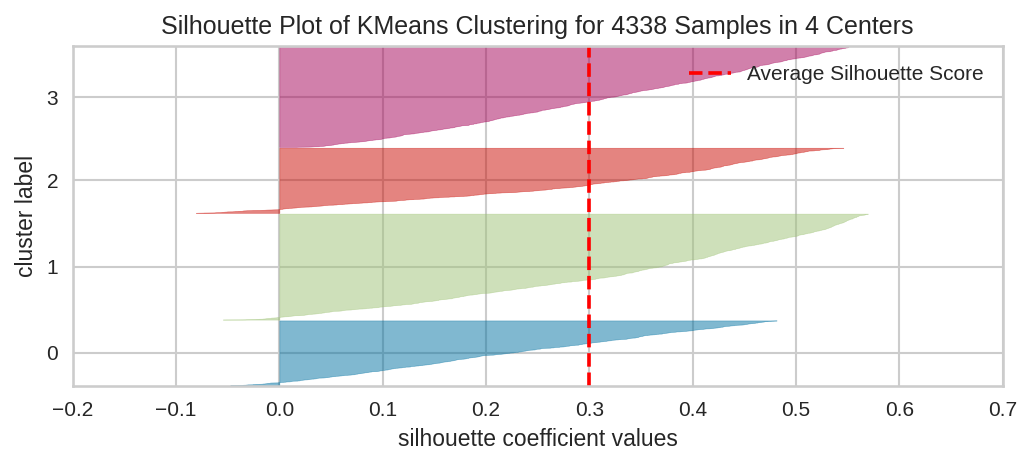

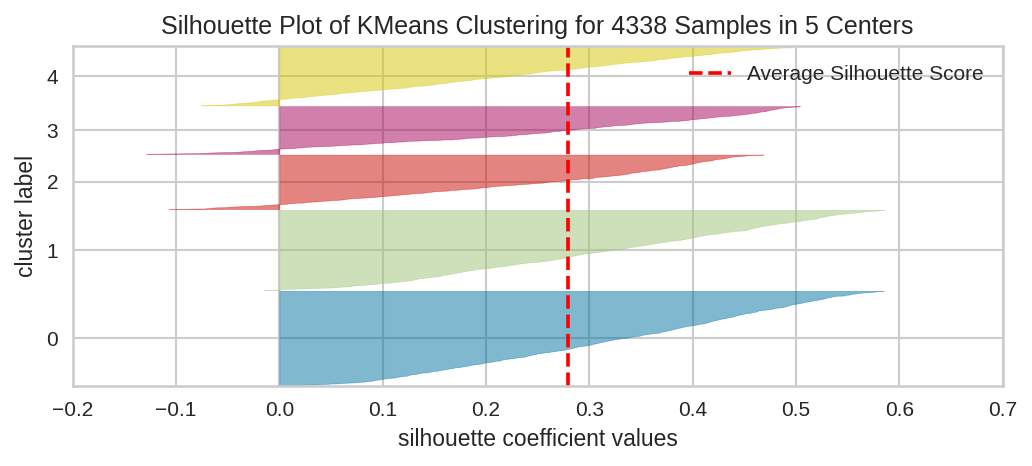

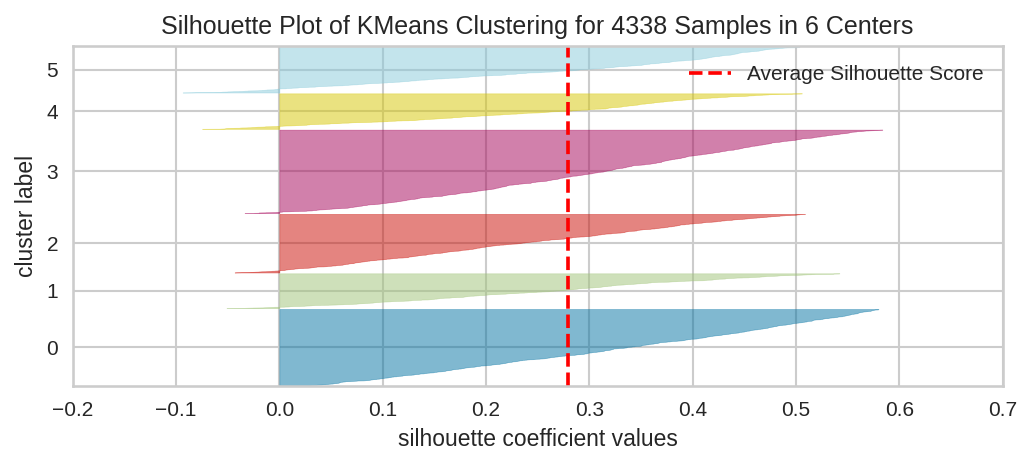

In [ ]:
# Visualizing the Silouette plots for the clusters
for i in range(2,7):
    plt.figure(figsize = (8, 3), dpi=150)
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

### **Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments**

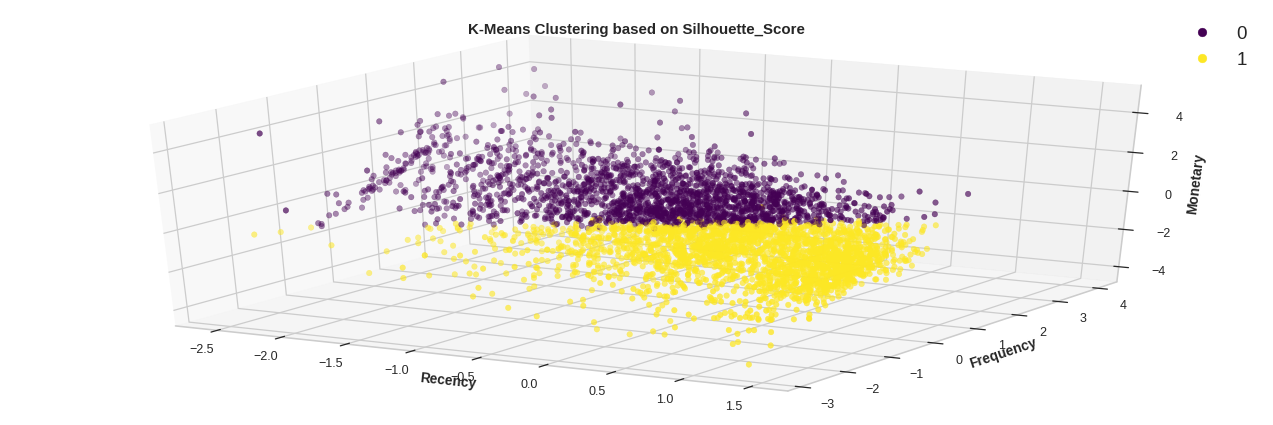

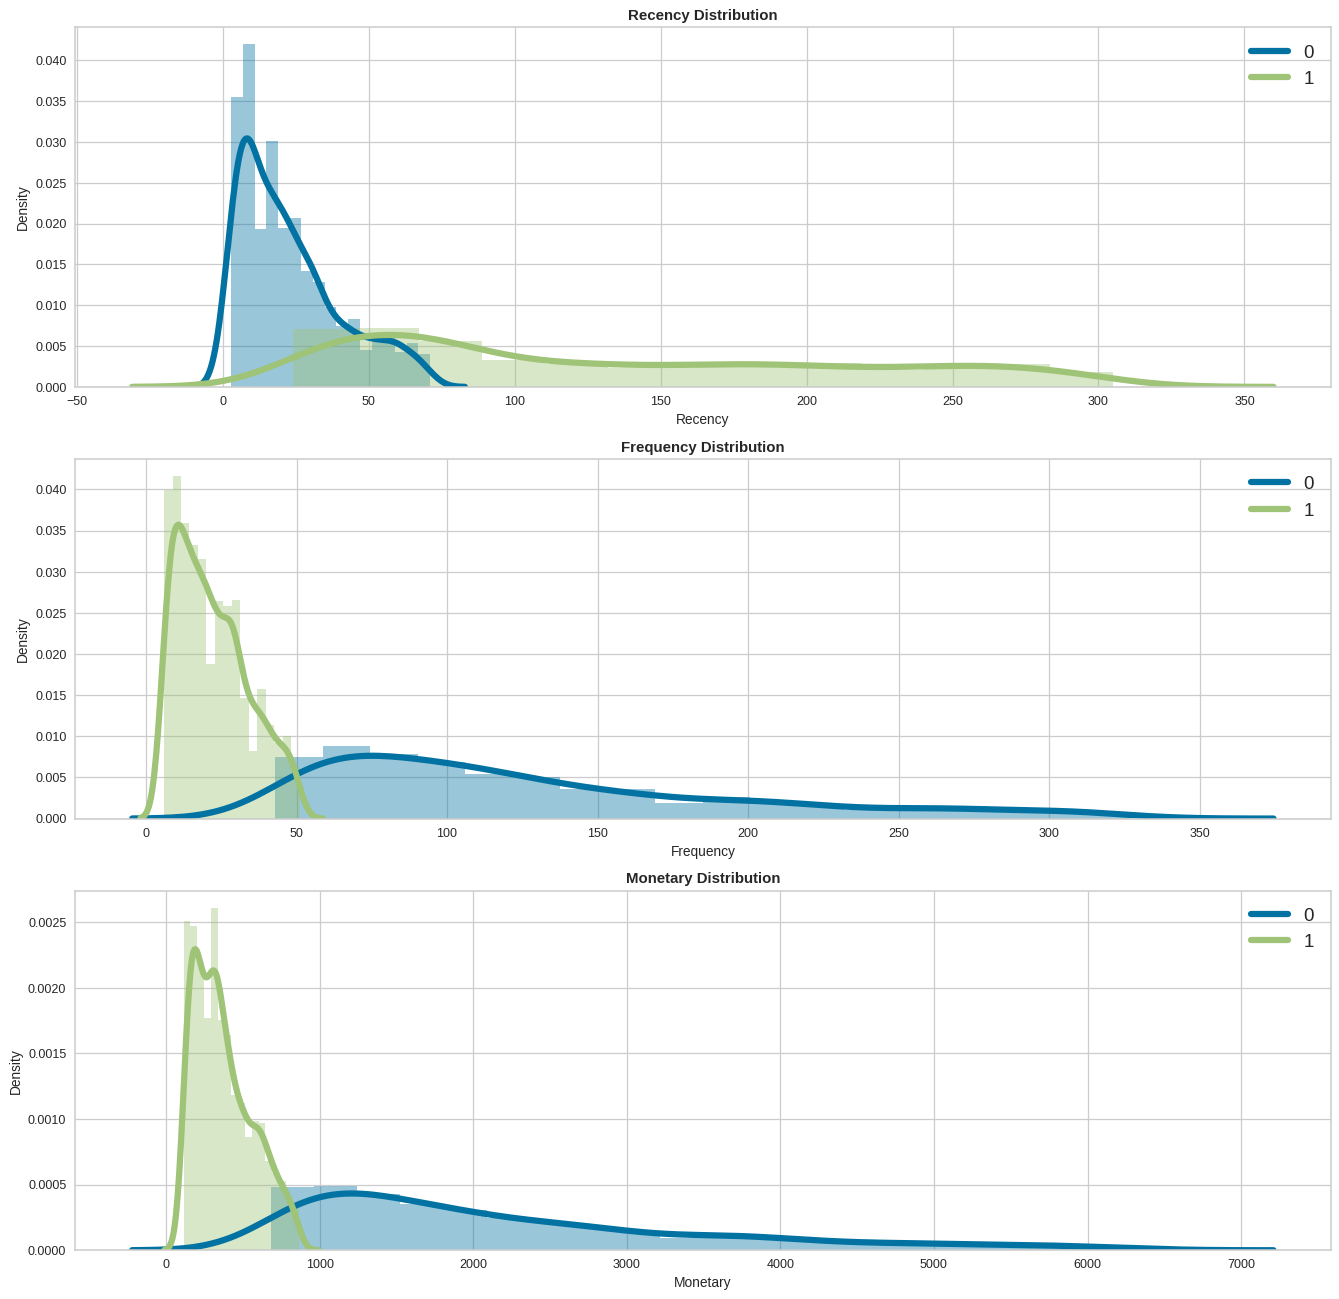



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=2,init="k-means++")             # Setting 2 Clusters
y = kmc.fit_predict(X)                                  # FItting the model
centers = kmc.cluster_centers_                          # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'  # Setting the title
segment_name = 'K-Means|2Cluster'
overlap_supress = 0.1
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

### **Fitting the model on n_clusters = 4 based on Both Elbow_Curve & Silhouette_Score.**

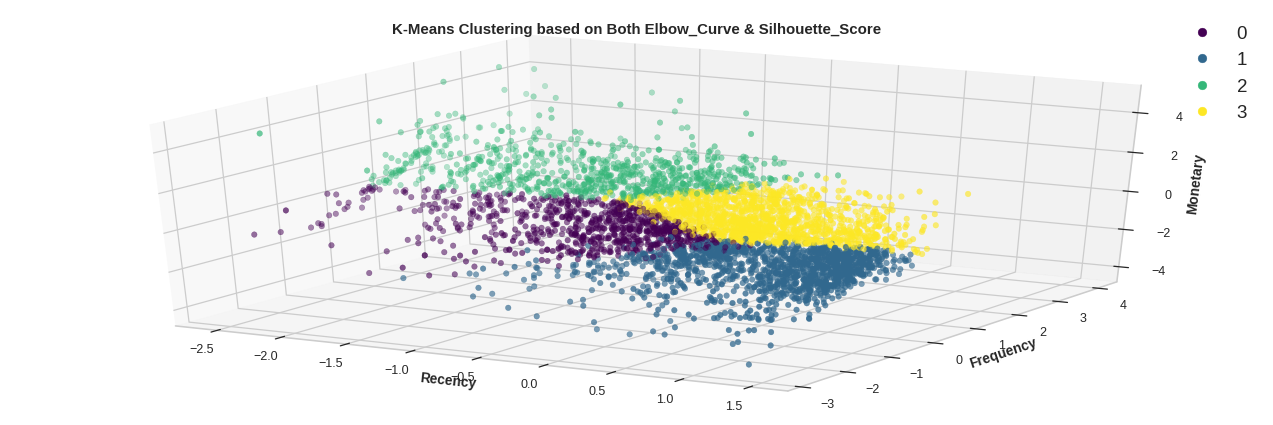

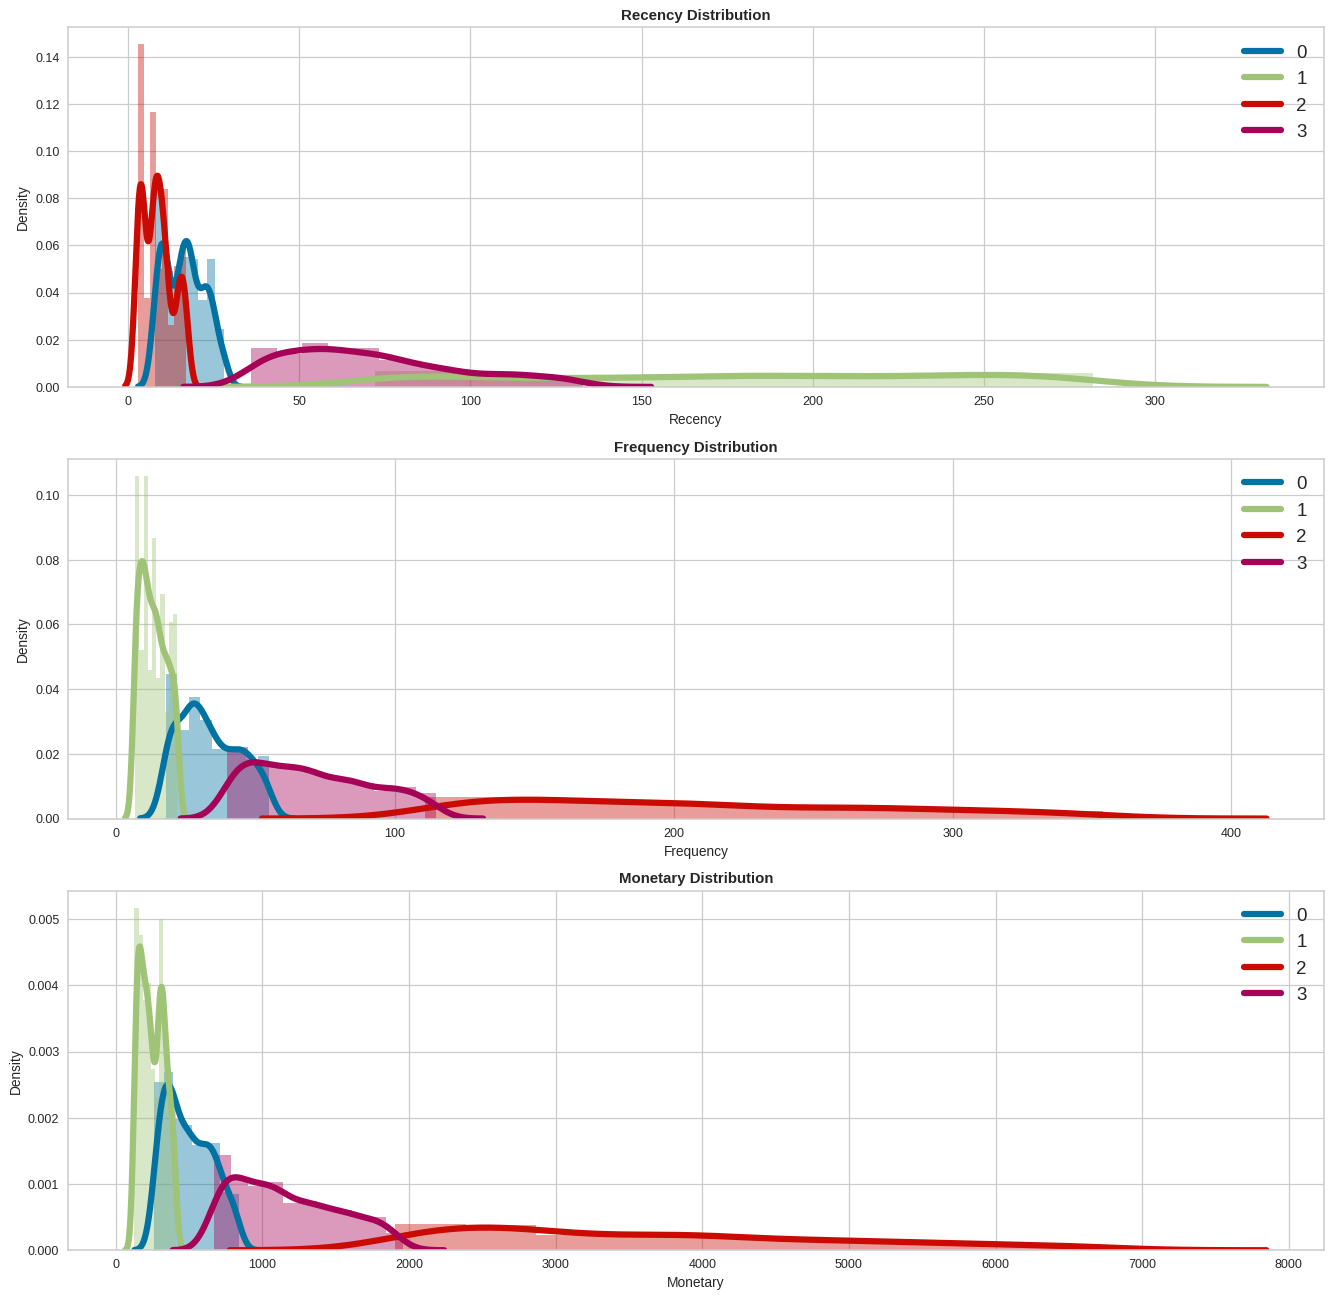



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Fitting the model on n_clusters = 4 based on Both Elbow_Curve & Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=4,init="k-means++")         # Setting 4 Clusters
y = kmc.fit_predict(X)                              # Fitting the model
centers = kmc.cluster_centers_                      # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Both Elbow_Curve & Silhouette_Score'         # Setting the title
segment_name = 'K-Means|4Cluster'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

### **Fitting the model on n_clusters = 5 based on Elbow_Curve to visualise the segments.**

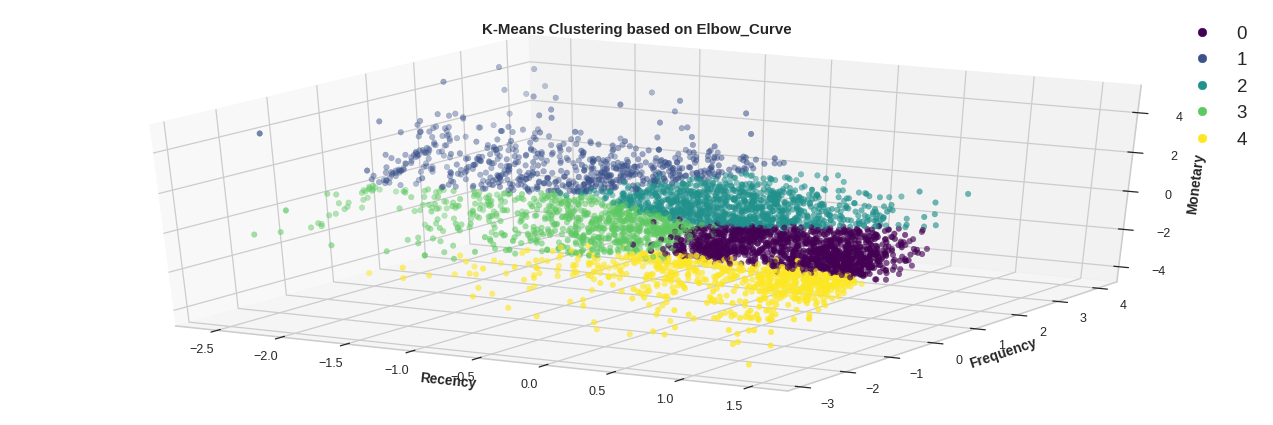

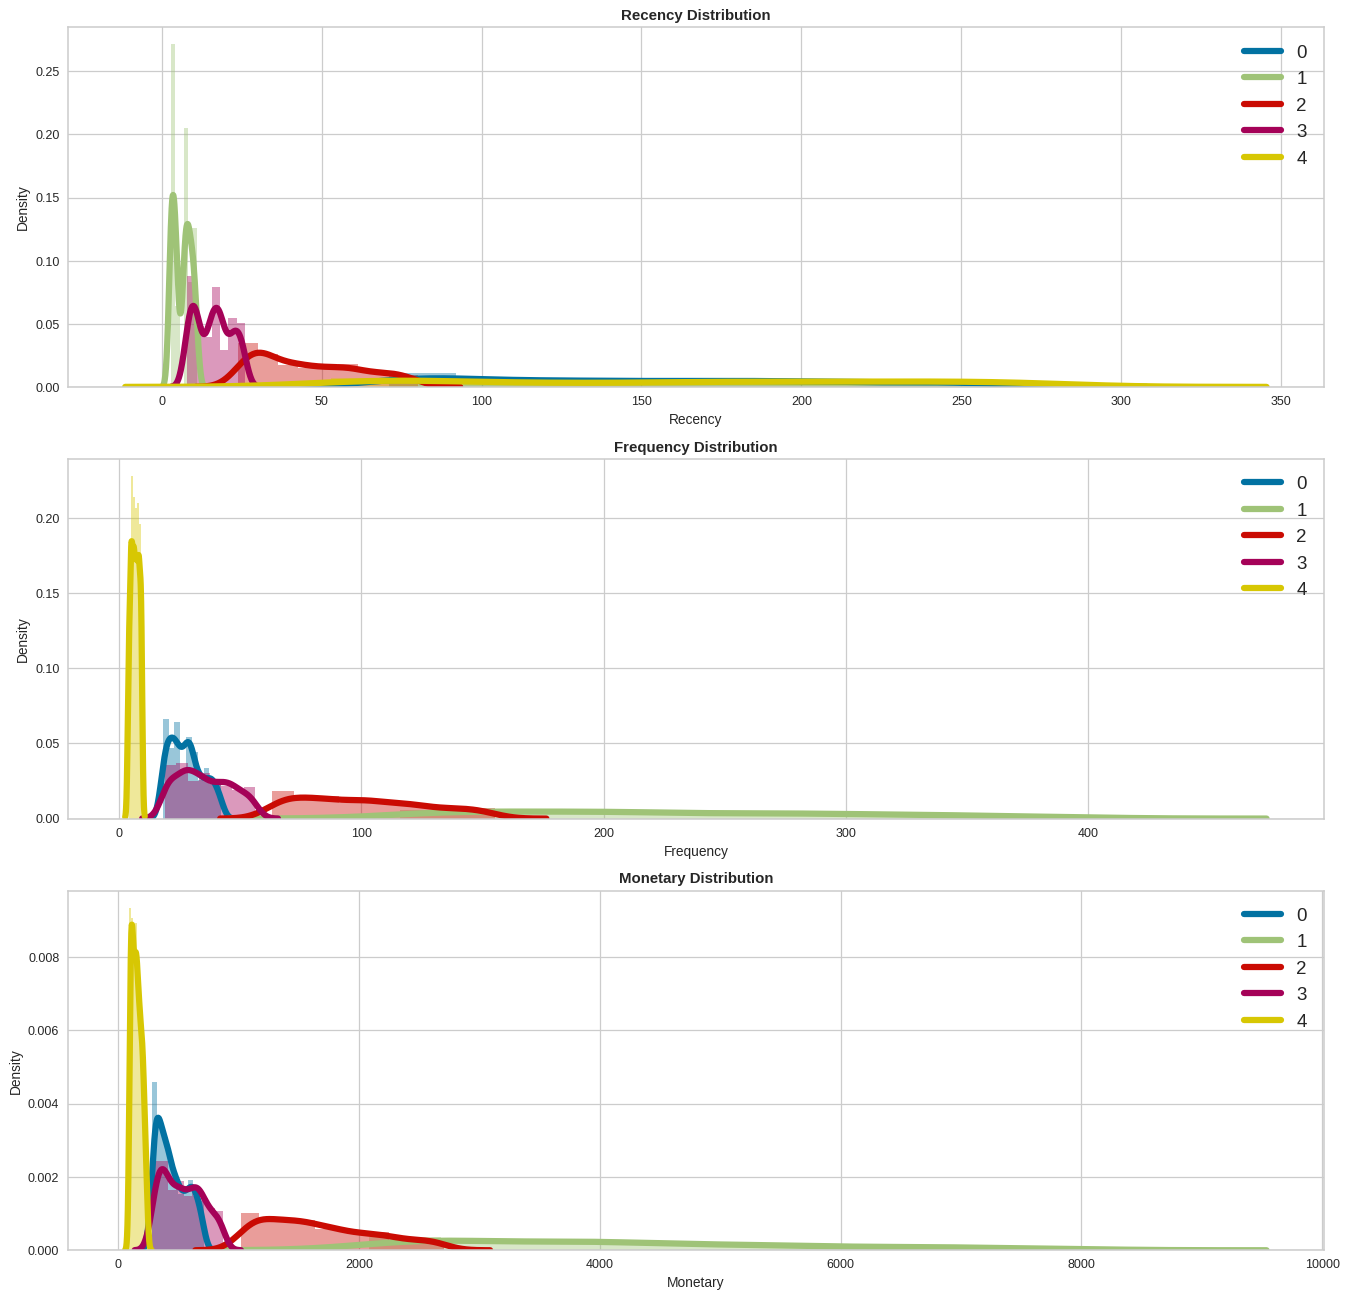



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Fitting the model on n_clusters = 5 based on Elbow_Curve to visualise the segments.
kmc = KMeans(n_clusters=5,init="k-means++")           # Setting 5 Clusters
y = kmc.fit_predict(X)                                # Fitting the model
centers = kmc.cluster_centers_                        # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Elbow_Curve'     # Setting the title
segment_name = 'K-Means|5Cluster'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

## **Hierarchical Clustering**

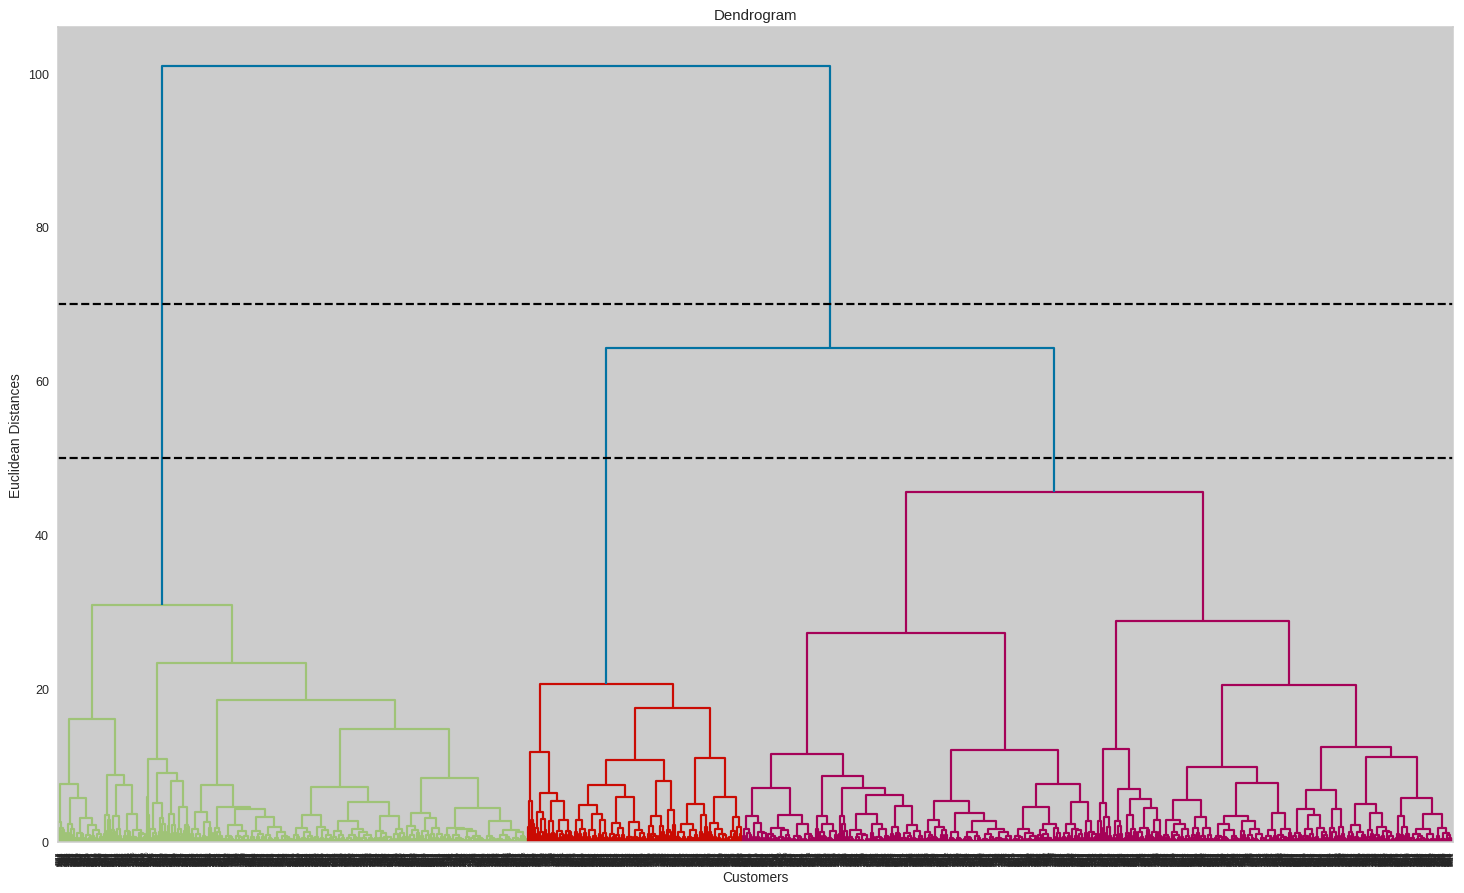

In [ ]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(20,12), dpi=90)                         # Setting the figure size
dendrogram(linkage(X, method='ward'), color_threshold=50)   # using ward linkage method to differ similarities
plt.title('Dendrogram')                                     # Setting the title
plt.xlabel('Customers')                                     # Setting the x label
plt.ylabel('Euclidean Distances')                           # Setting y label
plt.axhline(y=70, color='black', linestyle='--')            # Setting the axis line for y=70
plt.axhline(y=50, color='black', linestyle='--')            # Setting the axis line for y=50
plt.show()

Interpretation:

We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). We can set this threshold as 50 or 70 and draw a horizontal line as shown in dendogram above.

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. The larger threshold (y=70) results in 2 clusters while the smaller (y=50) results in 3 clusters.

### **Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 70**

---



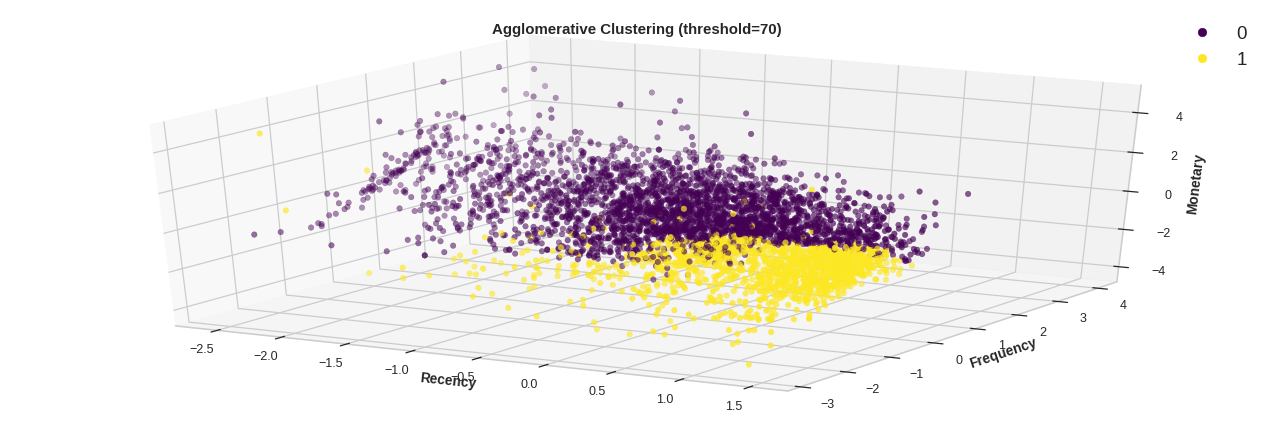

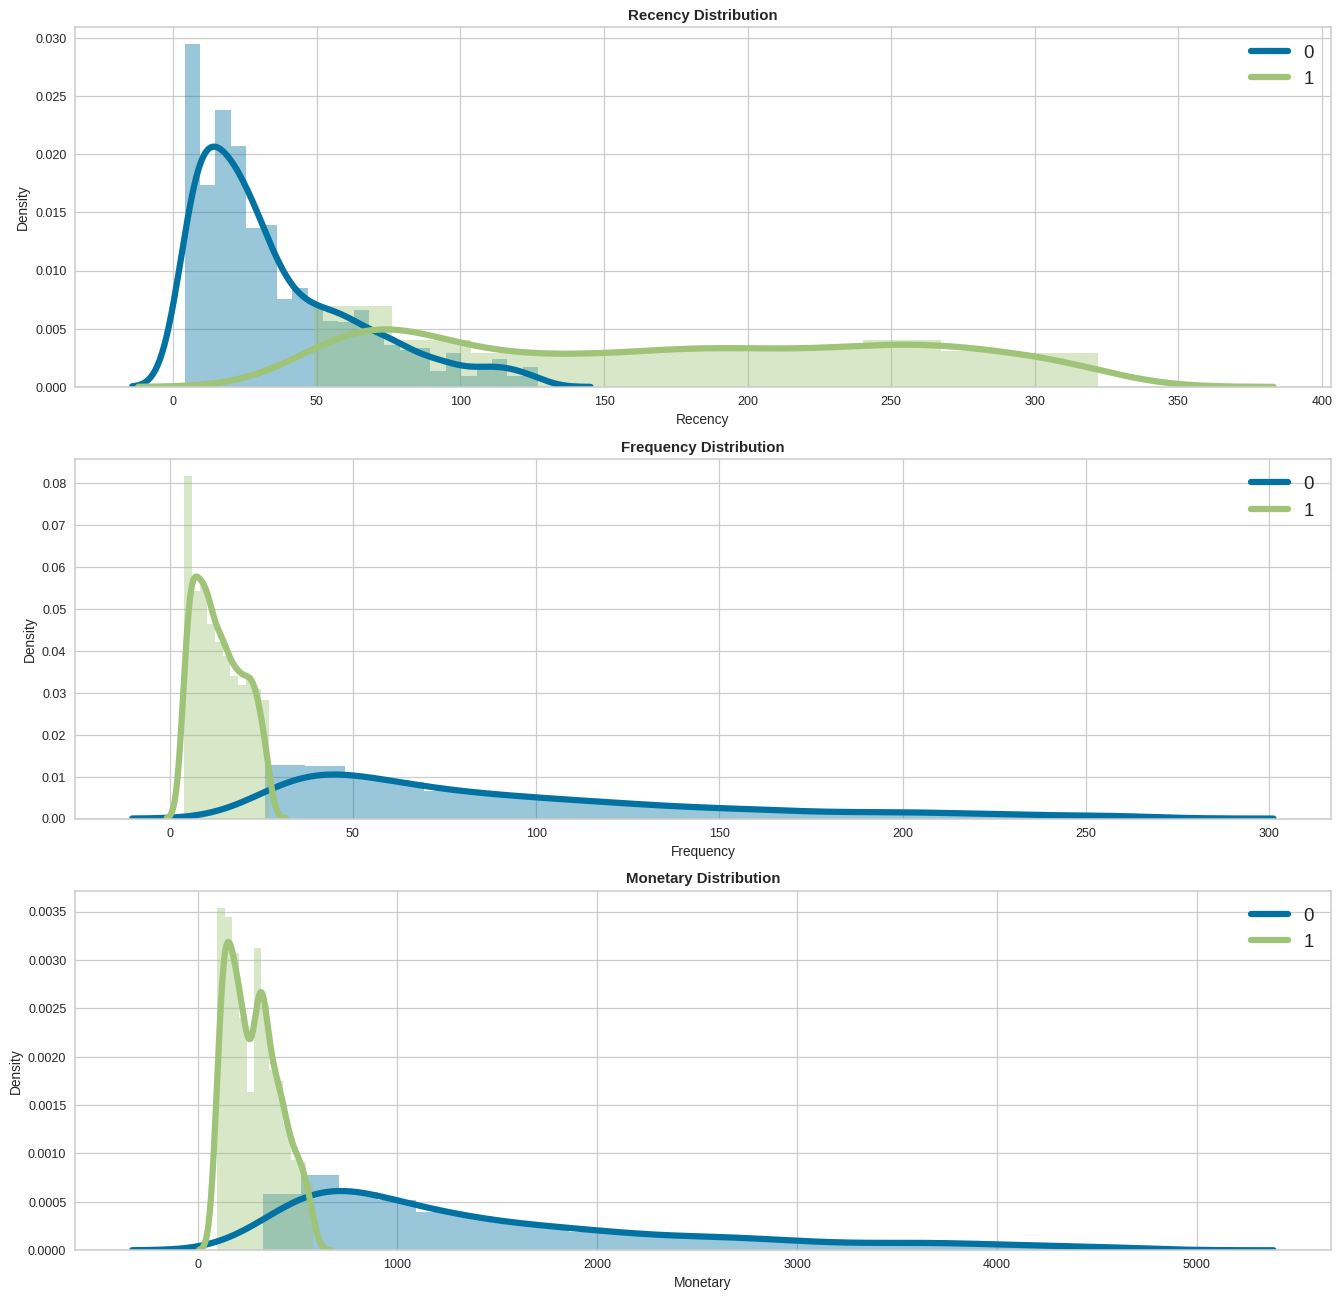



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 70
ahc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')     # Initializing the model
y = ahc.fit_predict(X)                                                                # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 2
title = 'Agglomerative Clustering (threshold=70)'                                     # Setting the title
segment_name = 'hierarchical|2Cluster'
overlap_supress = 0.1
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

### **Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 50**

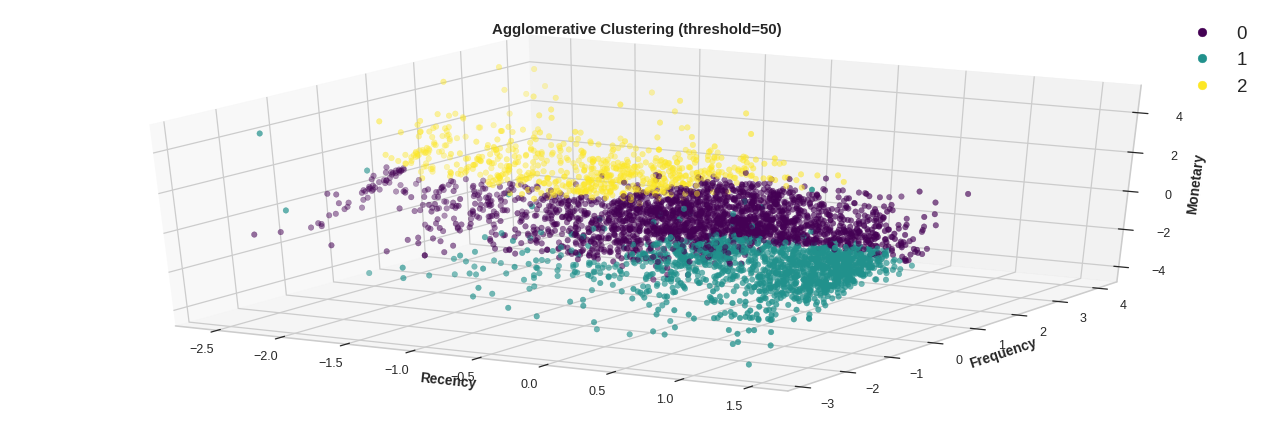

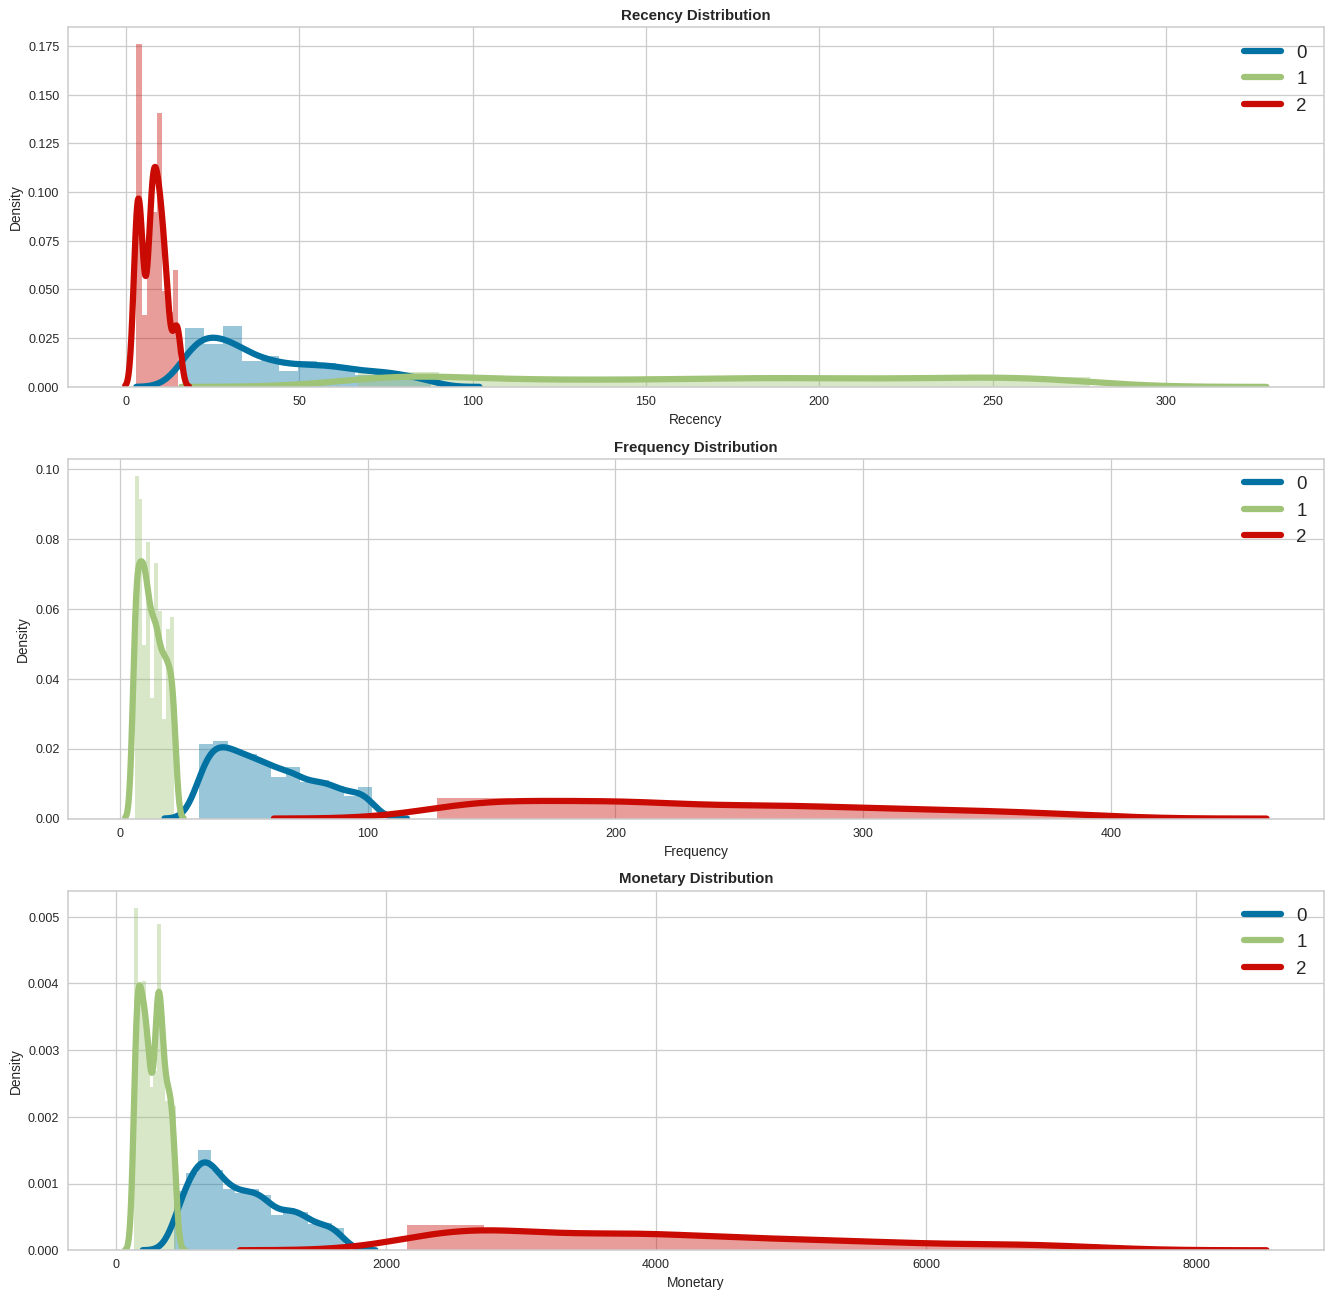



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 50
ahc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')     # Initializing the model
y = ahc.fit_predict(X)                                                                # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 3
title = 'Agglomerative Clustering (threshold=50)'                                     # Setting the title
segment_name = 'hierarchical|3Cluster'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

## **DBScan Clusterer**

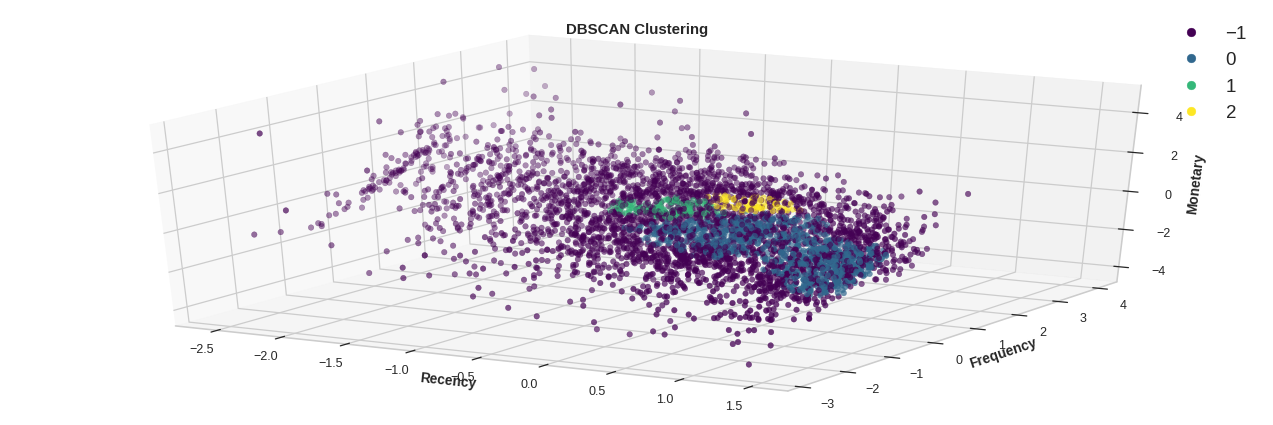

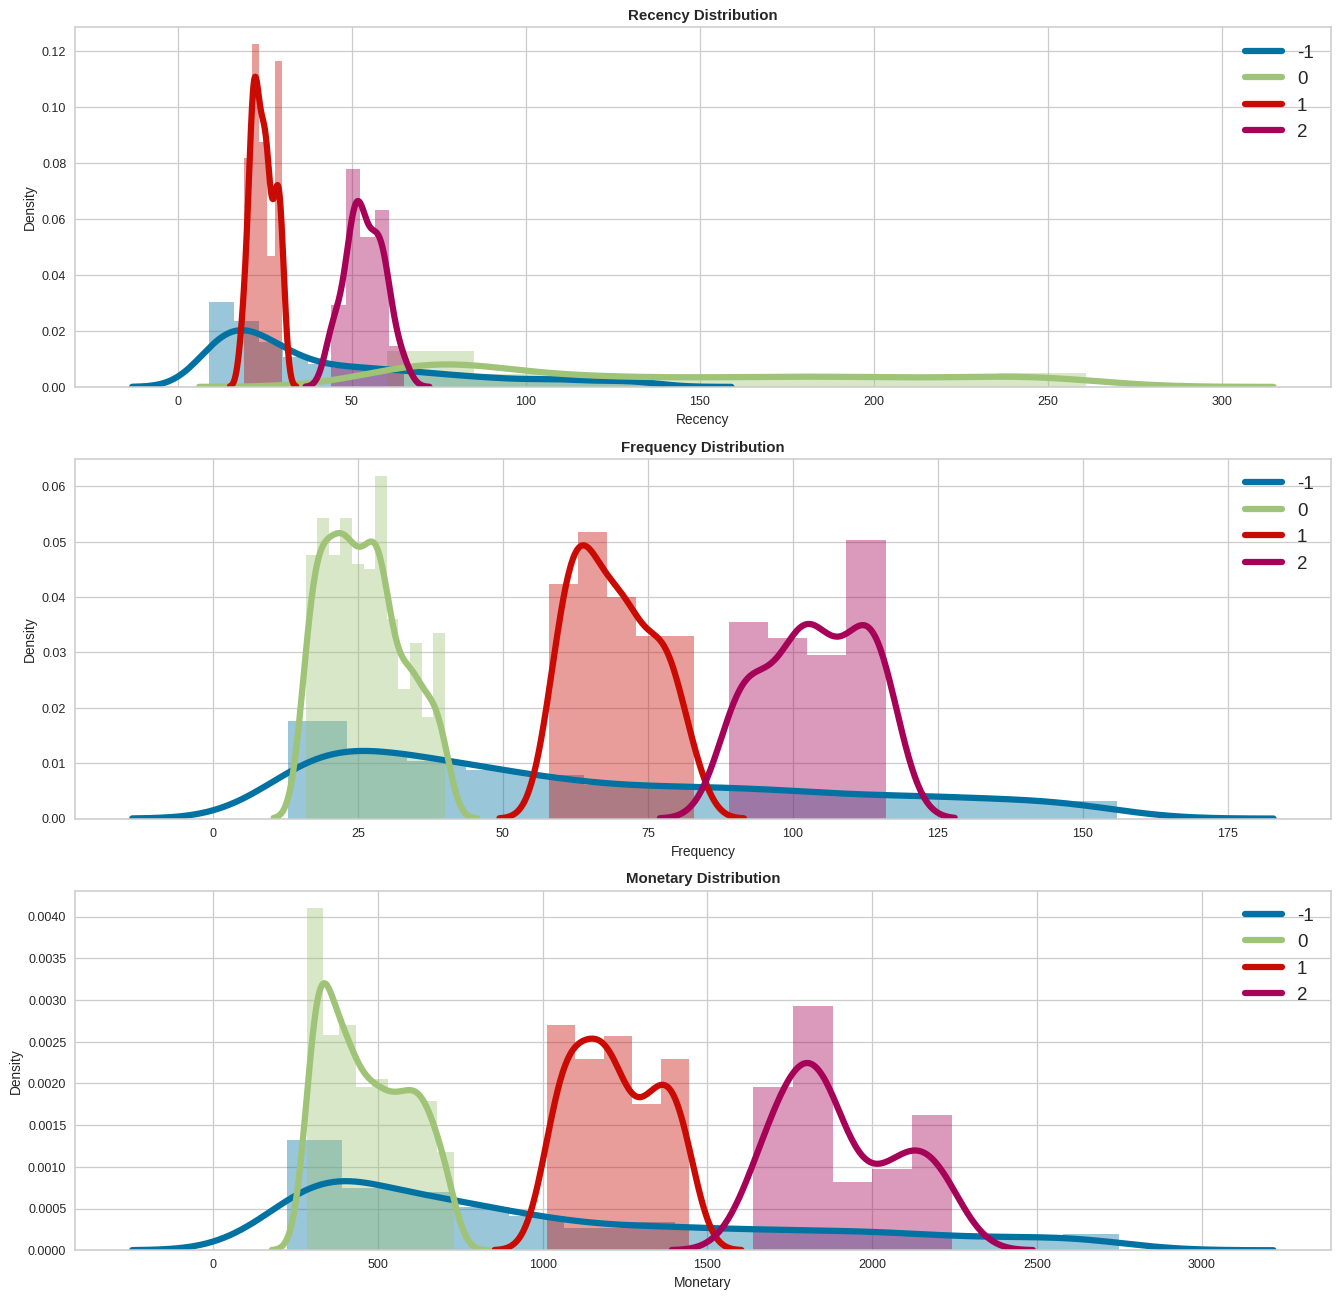



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Fitting DBSCAN clusterer
dbsc = DBSCAN(eps=0.2, min_samples=25)                                # Initializing the model
y = dbsc.fit_predict(X)                                               # Fitting the model

# Plotting Clusters for Visualization
title = 'DBSCAN Clustering'                                           # Setting the title
segment_name = 'DBSCAN'
overlap_supress = 0.2
conclusion[segment_name] = plots_stats_summary(y, segment_name, title, overlap_supress)

Density-based spatial clustering of applications with noise (DBSCAN) is an alternative to KMeans and hierarchical clustering. It does not require us to specify the number of clusters, as the clusters are formed by a process of linking neighbor points together.

It avoids outliers and identifies nested clusters within the data. The data is muddled and does not have major visible nested cluster, yet it has identified 4 clusters as shown above based on the hyperparameters defined.

# **Conclusion**

We started with a simple binning and quantile based simple segmentation model first then moved to more complex models because simple implementation helps having a first glance at the data and know where/how to exploit it better.

Then we moved to k-means clustering and visualized the results with different number of clusters. As we know there is no assurance that k-means will lead to the global best solution. We moved forward and tried Hierarchical Clustering and DBSCAN clusterer as well.

We created several useful clusters of customers on the basis of different metrics and methods to cateorize the customers on the basis of their beavioural attributes to define their valuability, loyality, profitability etc for the business. Though significantly separated clusters are not visible in the plots, but the clusters obtained is fairly valid and useful as per the algorithms and the statistics extracted from the data.

Segments depends on how the business plans to use the results, and the level of granularity they want to see in the clusters. Keeping these points in view we clustered the major segments based on our understanding as per diffrent criteria as shown in the summary dataframe.